# **PROYECTO 2**

# **Exploración de Datos**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

from sklearn import metrics  #MEDIDA r2
from sklearn.metrics import mean_squared_error #MEDIDA RMSE
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import statistics
import math
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Comenzamos leyendo el dataset de Properarti y explorando un poco sus caraterísticas.

Miramos su tamaño inicial

In [ ]:
df = pd.read_csv('gdrive/MyDrive/Colab Files/DS_Proyecto_01_Datos_Properati.csv')
df.shape

(146660, 19)

In [ ]:
print({'Filas': df.shape[0], 'Columnas': df.shape[1]},'\n')

{'Filas': 146660, 'Columnas': 19} 



Observamos el nombre de cada columnnas y la primera fila de los datos

In [ ]:
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [ ]:
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


Según lo estudiado en el Proyecto uno, selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa. Ya que ellas representa el 
**XXXXXXXXX%** 
de los valores del dataset, por lo cual nos quedamos solo que este tipo de propiedad

In [ ]:
data = df[((df['property_type'] == "Departamento") | 
                  (df['property_type'] == "Casa") |
                  (df['property_type'] == "PH")) 
                  & (df['l2'] == "Capital Federal")]

data.shape

(91485, 19)

In [ ]:
print(data["property_type"].value_counts(),'\n')

Departamento    79029
PH               9764
Casa             2692
Name: property_type, dtype: int64 



**Valores Faltantes**: imprimimos en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
data.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                4534
lon                4548
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

**Las propiedades no pueden tener surface_covered mayor a surface_total**
 por lo que ajustamos surface total y covered

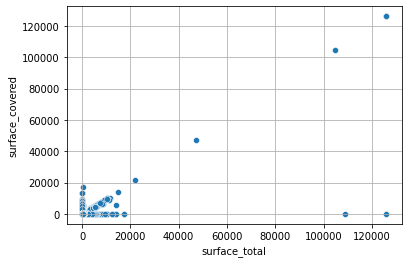

In [ ]:
sns.scatterplot(data=data, x='surface_total', y='surface_covered')
plt.grid()
plt.show()

In [ ]:
data.drop(data.loc[data['surface_covered'] > data['surface_total']].index,inplace=True ,axis=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Filtramos los datos, y observamos que despues del filtrado ya ninguna propiedad tiene una superficie cubierta mayor a la superficie total

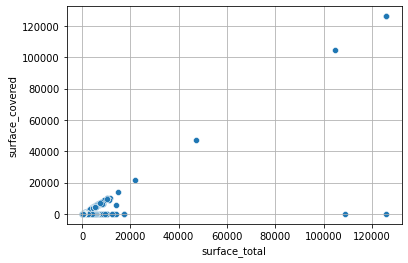

In [ ]:
sns.scatterplot(data=data, x='surface_total', y='surface_covered')
plt.grid()
plt.show()

- **Graficamos diagramas de caja para cada variable de interés asi como gráficos de barra para las variables discretas e histogramas para las continuas**, para tener una mejor visualización de las distribuciones

In [ ]:
#Ver las distribuciones de las carateristicas seleccionadas

def Grafica_Distribuciones(dataset):
  plt.figure(figsize = (18,10))
  plt.suptitle("Distribución de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "blue", fontweight = "black")

  plt.subplot(2,3,1)
  sns.countplot(data= dataset, x= 'rooms')
  plt.xticks(rotation = 45)
  plt.xlabel("Ambientes", fontweight = "black", fontsize = 14)
  plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

  plt.subplot(2,3,2)
  sns.countplot(data= dataset, x= 'bedrooms')
  plt.xticks(rotation = 45)
  plt.xlabel("Habitaciones", fontweight = "black", fontsize = 14)
  plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

  plt.subplot(2,3,3)
  sns.countplot(data= dataset, x= 'bathrooms')
  plt.xticks(rotation = 45)
  plt.xlabel("Baños", fontweight = "black", fontsize = 14)
  plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

  plt.subplot(2,3,4)
  sns.histplot(dataset, x = 'surface_total', kde=True, bins = 50)
  plt.yticks(rotation = 45)
  plt.xlabel("Superficie total (m2)", fontweight = "black", fontsize = 14)
  plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

  plt.subplot(2,3,5)
  sns.histplot(dataset, x = 'surface_covered', kde=True, bins = 50)
  plt.yticks(rotation = 45)
  plt.xlabel("Superficie cubierta (m2)", fontweight = "black", fontsize = 14)
  plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

  plt.subplot(2,3,6)
  sns.histplot(dataset, x = 'price', kde=True, bins = 60)
  plt.yticks(rotation = 45)
  plt.xticks(rotation = 45)
  plt.xlabel("Precio (USD)", fontweight = "black", fontsize = 14)
  plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

  plt.show()

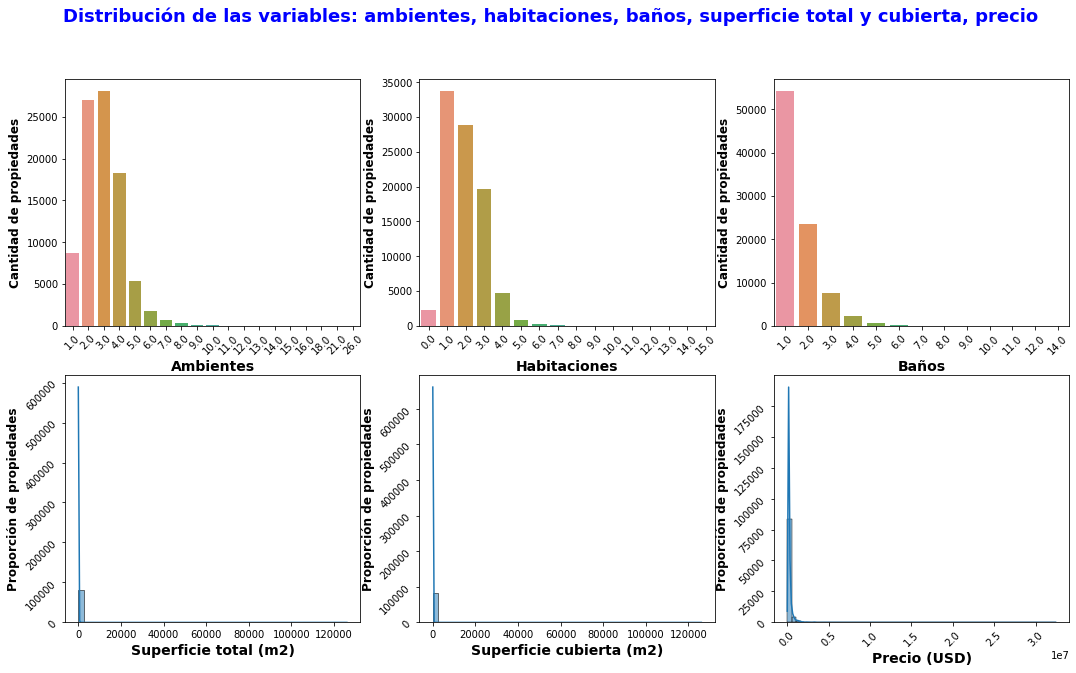

In [ ]:
Grafica_Distribuciones(data)

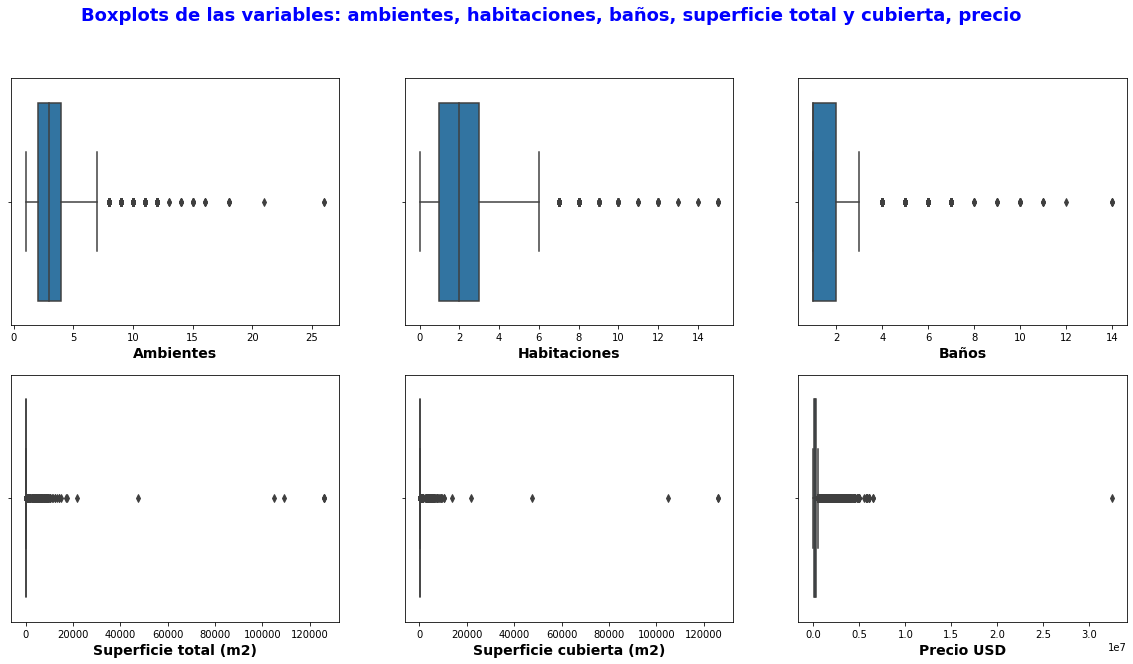

In [ ]:
#Ver la dispersion de las carateristicas seleccionadas

plt.figure(figsize = (20,10))
plt.suptitle("Boxplots de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "blue", fontweight = "black")

plt.subplot(2,3,1)
sns.boxplot(data= data, x= 'rooms')
plt.xlabel("Ambientes", fontweight = "black", fontsize = 14)

plt.subplot(2,3,2)
sns.boxplot(data= data, x= 'bedrooms')
plt.xlabel("Habitaciones", fontweight = "black", fontsize = 14)

plt.subplot(2,3,3)
sns.boxplot(data= data, x= 'bathrooms')
plt.xlabel("Baños", fontweight = "black", fontsize = 14)

plt.subplot(2,3,4)
sns.boxplot(data= data, x= 'surface_total')
plt.xlabel("Superficie total (m2)", fontweight = "black", fontsize = 14)

plt.subplot(2,3,5)
sns.boxplot(data= data, x= 'surface_covered')
plt.xlabel("Superficie cubierta (m2)", fontweight = "black", fontsize = 14)

plt.subplot(2,3,6)
sns.boxplot(data= data, x= 'price')
plt.xlabel("Precio USD", fontweight = "black", fontsize = 14)

plt.show();

En los gráficos se puede ver la dispersión que poseen los valores de la Superficie total, cubierta y el precio.

# **Parte A**

Para trabajar el Dataset, iniciamos con la imputación de los valores faltantes.

Luego de la primera exploración y selección de datos nuestro dataset original pasó de tener:
**Filas**: 146660 a 90725, quedandonos aprox con el 62% de los datos.

In [ ]:
print({'Df': df.shape})
print({'Data': data.shape})

{'Df': (146660, 19)}
{'Data': (90725, 19)}


## **Parte A: Imputacion de Valores**

In [ ]:
data_1 = data.copy()

In [ ]:
data_1.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                4529
lon                4543
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2163
surface_total      8917
surface_covered    9235
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

Realizaremos 2 formas de Imputación:

* Imputación estadística
* Imputación con KnnImputer

Y se evalua el rendimiendo usando las métricas r2 y RMSE, para la selección

In [ ]:
X= data_1[["bathrooms","surface_total","surface_covered"]]
y=data_1["price"]
X.head()

,bathrooms,surface_total,surface_covered
0,2.0,140.0,140.0
1,2.0,70.0,58.0
2,1.0,45.0,45.0
3,1.0,85.0,50.0
5,1.0,56.0,56.0


In [ ]:
X.isnull().sum()

bathrooms          2163
surface_total      8917
surface_covered    9235
dtype: int64

**Transformación 1 Imputacion Estadistica**

In [ ]:
tree = DecisionTreeRegressor()
resultador2 = []
resultadoRMSE = []

tipos = ['mean', 'median', 'most_frequent', 'constant']
for t in tipos:
    imputer=SimpleImputer(strategy=t)
    imputer.fit(X)
    X_trans= imputer.transform(X)
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_trans,y)
    y_pred = tree.predict(X_trans)
    r2 = metrics.r2_score(y, y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))
    resultador2.append(r2)
    resultadoRMSE.append(RMSE)
    print("La estrategia utilizada--->",t)
    print("RMSE segun el tipo de estrategia:",RMSE.round(2))
    print("r2 segun el tipo de estrategia:",r2.round(2))
    print("----------------------------------------")

La estrategia utilizada---> mean
RMSE segun el tipo de estrategia: 147506.21
r2 segun el tipo de estrategia: 0.79
----------------------------------------
La estrategia utilizada---> median
RMSE segun el tipo de estrategia: 147357.36
r2 segun el tipo de estrategia: 0.79
----------------------------------------
La estrategia utilizada---> most_frequent
RMSE segun el tipo de estrategia: 147312.7
r2 segun el tipo de estrategia: 0.79
----------------------------------------
La estrategia utilizada---> constant
RMSE segun el tipo de estrategia: 147117.07
r2 segun el tipo de estrategia: 0.79
----------------------------------------


In [ ]:
print('Missing: %d' % sum(np.isnan(X_trans).flatten()))

Missing: 0


El uso de constant es el que mejores resultados otorga en cuanto al RMSE, aunque no es una diferencia tan elevada con respecto a los otros tipos de estrategia.

*Constant*

*   *r2*: 0.79
*   *RMSE*: 147117.07




**Transformación 2 Imputacion con KNN**

Nota: El knn con mejor rendimiento se obtiene con 3 vecinos, debido a la demora de ejecutar estas lineas, solo se dejara el numero 3

In [ ]:
vecinos = [3]
for v in vecinos:
    KNN_imputer=KNNImputer(n_neighbors=v)
    KNN_imputer.fit(X)
    X_knn= KNN_imputer.transform(X)
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_knn,y)
    y_pred = tree.predict(X_knn)
    r2 = metrics.r2_score(y, y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))
    resultador2.append(r2)
    resultadoRMSE.append(RMSE)
    print("La cantidad de vecinos utilizados--->",v)
    print("RMSE segun el tipo de estrategia:",RMSE.round(2))
    print("r2 segun el tipo de estrategia:",r2.round(2))
    print("----------------------------------------")

La cantidad de vecinos utilizados---> 3
RMSE segun el tipo de estrategia: 146039.04
r2 segun el tipo de estrategia: 0.8
----------------------------------------


In [ ]:
print('Missing: %d' % sum(np.isnan(X_knn).flatten()))

Missing: 0


La cantidad de vecinos en 3 otorga los mejores resultados y logra superar al Constant del SimpleImputer.

*Constant del SimpleImputer*

* *r2*: 0.792
* *RMSE*: 147117.07

*KNNImputer vecinos = 3*

* *r2*: 0.795
* *RMSE*: 146039.04

### **Aplicacion del KNNImputer en dataset**


In [ ]:
data1 = data.copy()

In [ ]:
data1.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                4529
lon                4543
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2163
surface_total      8917
surface_covered    9235
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [ ]:
KNN_imputer = KNNImputer(n_neighbors=3)
KNN_imputer = KNN_imputer.fit(data1.iloc[:,3:5])
data1.iloc[:,3:5] = KNN_imputer.transform(data1.iloc[:,3:5])

In [ ]:
KNN_imputer = KNNImputer(n_neighbors=3)
KNN_imputer = KNN_imputer.fit(data1.iloc[:,10:13])
data1.iloc[:,10:13] = KNN_imputer.transform(data1.iloc[:,10:13])

In [ ]:
data1.isnull().sum()

start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
dtype: int64

Se observan las características de las variables seleccionadas, y de la variable baño se invierte los ejes para ver mejor el valor que toman los datos imputados

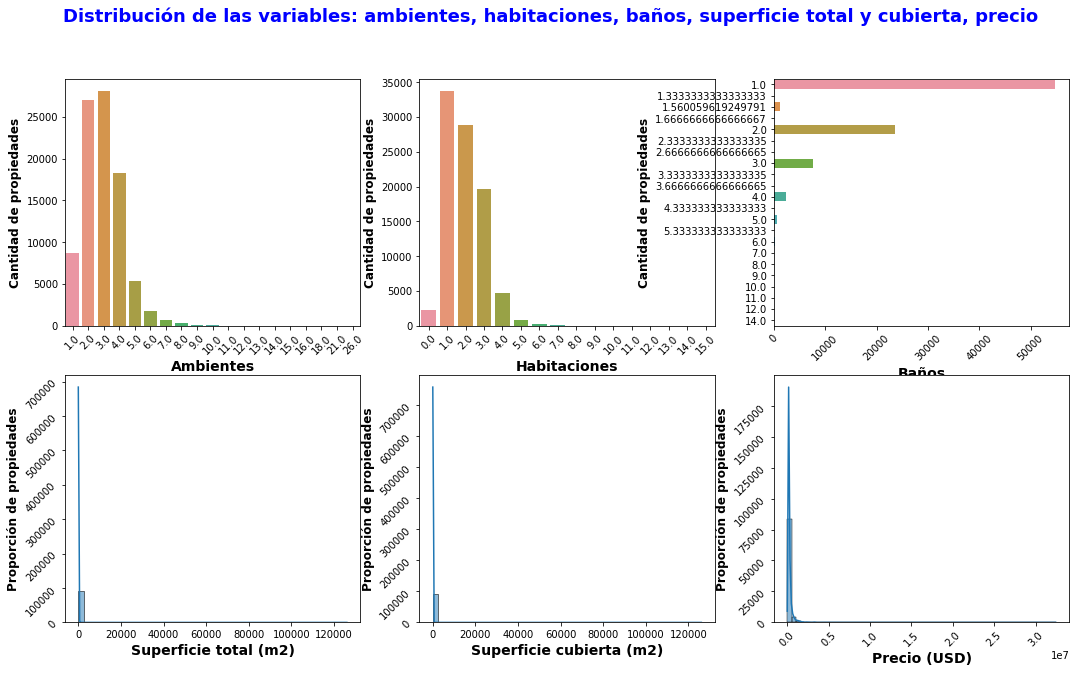

In [ ]:
#Ver las distribuciones de las carateristicas seleccionadas

plt.figure(figsize = (18,10))
plt.suptitle("Distribución de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "blue", fontweight = "black")

plt.subplot(2,3,1)
sns.countplot(data= data1, x= 'rooms')
plt.xticks(rotation = 45)
plt.xlabel("Ambientes", fontweight = "black", fontsize = 14)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,2)
sns.countplot(data= data1, x= 'bedrooms')
plt.xticks(rotation = 45)
plt.xlabel("Habitaciones", fontweight = "black", fontsize = 14)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,3)
sns.countplot(data= data1, y= 'bathrooms')
plt.xticks(rotation = 45)
plt.xlabel("Baños", fontweight = "black", fontsize = 14)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,4)
sns.histplot(data1, x = 'surface_total', kde=True, bins = 50)
plt.yticks(rotation = 45)
plt.xlabel("Superficie total (m2)", fontweight = "black", fontsize = 14)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,5)
sns.histplot(data1, x = 'surface_covered', kde=True, bins = 50)
plt.yticks(rotation = 45)
plt.xlabel("Superficie cubierta (m2)", fontweight = "black", fontsize = 14)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,6)
sns.histplot(data1, x = 'price', kde=True, bins = 60)
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel("Precio (USD)", fontweight = "black", fontsize = 14)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.show()

Se observan que las todas las variables excepto la variable baño, mantienen la misma distribución.

Si embargo la variable baño varia en su distribución a demás de tomar valores decimales, por los que se evalua usar otro tipo de imputación para ella.

Por otro lado, se observan las distribuciones de las variables "lat" y "lon" originales e imputadas con KNNImputer

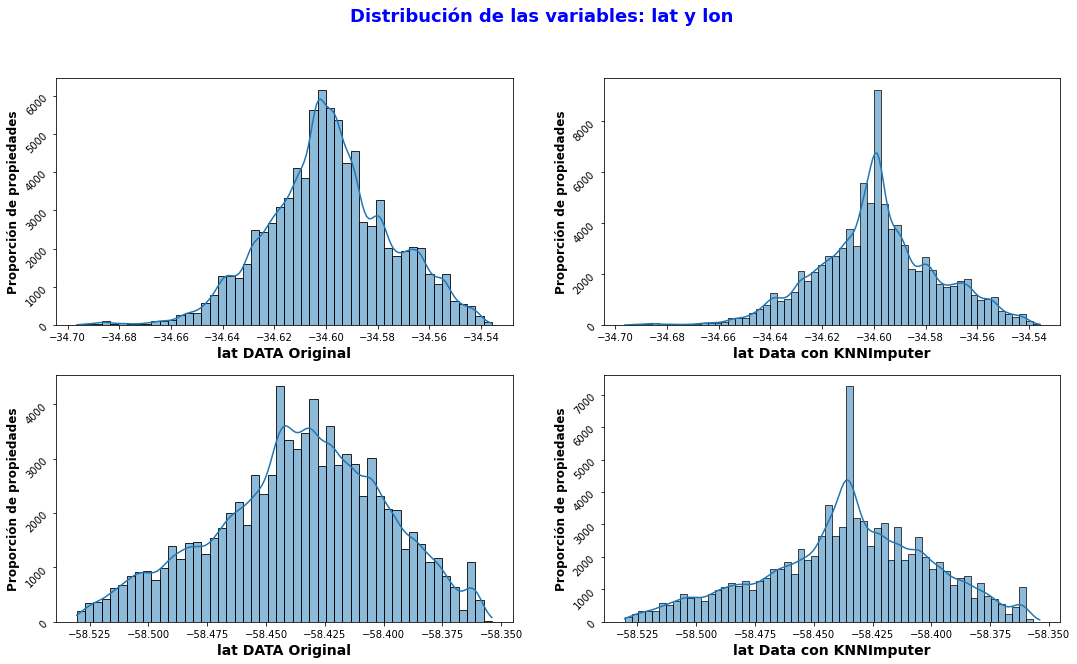

In [ ]:
plt.figure(figsize = (18,10))
plt.suptitle("Distribución de las variables: lat y lon", fontsize=18, color = "blue", fontweight = "black")

plt.subplot(2,2,1)
sns.histplot(data, x = 'lat', kde=True, bins = 50)
plt.yticks(rotation = 45)
plt.xlabel("lat DATA Original", fontweight = "black", fontsize = 14)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,2,2)
sns.histplot(data1, x = 'lat', kde=True, bins = 60)
plt.yticks(rotation = 45)
plt.xlabel("lat Data con KNNImputer", fontweight = "black", fontsize = 14)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,2,3)
sns.histplot(data, x = 'lon', kde=True, bins = 50)
plt.yticks(rotation = 45)
plt.xlabel("lat DATA Original", fontweight = "black", fontsize = 14)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,2,4)
sns.histplot(data1, x = 'lon', kde=True, bins = 60)
plt.yticks(rotation = 45)
plt.xlabel("lat Data con KNNImputer", fontweight = "black", fontsize = 14)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.show()

Se observan que la distribución, varia mucho con respecto a la original por lo que se opta por realizar otro tipo de imputación para esta variable

### **Imputacion de valores con KNNImputer y otros en el Dataset**

In [ ]:
data2 = data.copy()

In [ ]:
data2.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                4529
lon                4543
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2163
surface_total      8917
surface_covered    9235
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

**Imputaciónde valores para superficie total y cubierta con KNNImputer**

In [ ]:
KNN_imputer = KNNImputer(n_neighbors=3)
KNN_imputer = KNN_imputer.fit(data2.iloc[:,11:13])
data2.iloc[:,11:13] = KNN_imputer.transform(data2.iloc[:,11:13])

Observamos que tanto varían los datos de baños según el tipo de propiedad

In [ ]:
data_1.bathrooms.isnull().groupby([data_1['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,140
1,Departamento,1935
2,PH,88


**Imputaciónde valores para los baños con la moda**: se agrupan por tipo de propiedad para tener mejor exactitud en la imputación de los datos

In [ ]:
#Imputacion para los baños
data2['bathrooms'] = data2.groupby('property_type')['bathrooms'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [ ]:
mode = lambda x: statistics.mode(x)

a = data2.groupby('property_type')['bathrooms'].agg(mode).reset_index(name='count')
type(a)
print(a.head())

  property_type  count
0          Casa    2.0
1  Departamento    1.0
2            PH    1.0


**Imputaciónde valores para la latitud y longitud con la mediana**: se agrupan por tipo de barrio para tener mejor exactitud en la imputación de los datos

In [ ]:
median = lambda x: statistics.median(x)

b = data2.groupby('l3')['lon'].agg(median).reset_index(name='count')
print(type(b))
print(b.head())

<class 'pandas.core.frame.DataFrame'>
          l3      count
0     Abasto -58.414273
1  Agronomía -58.491294
2    Almagro -58.413336
3  Balvanera -58.394095
4   Barracas -58.385906


In [ ]:
data2['lat'] = data2.groupby('l3')['lat'].apply(lambda x: x.fillna(x.median()))

In [ ]:
data2['lon'] = data2.groupby('l3')['lon'].apply(lambda x: x.fillna(x.median()))

In [ ]:
data2.isnull().sum()

start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
dtype: int64

- **Graficamos gráficos de barra para las variables discretas e histogramas para las continuas**, para tener una mejor visualización de las distribuciones

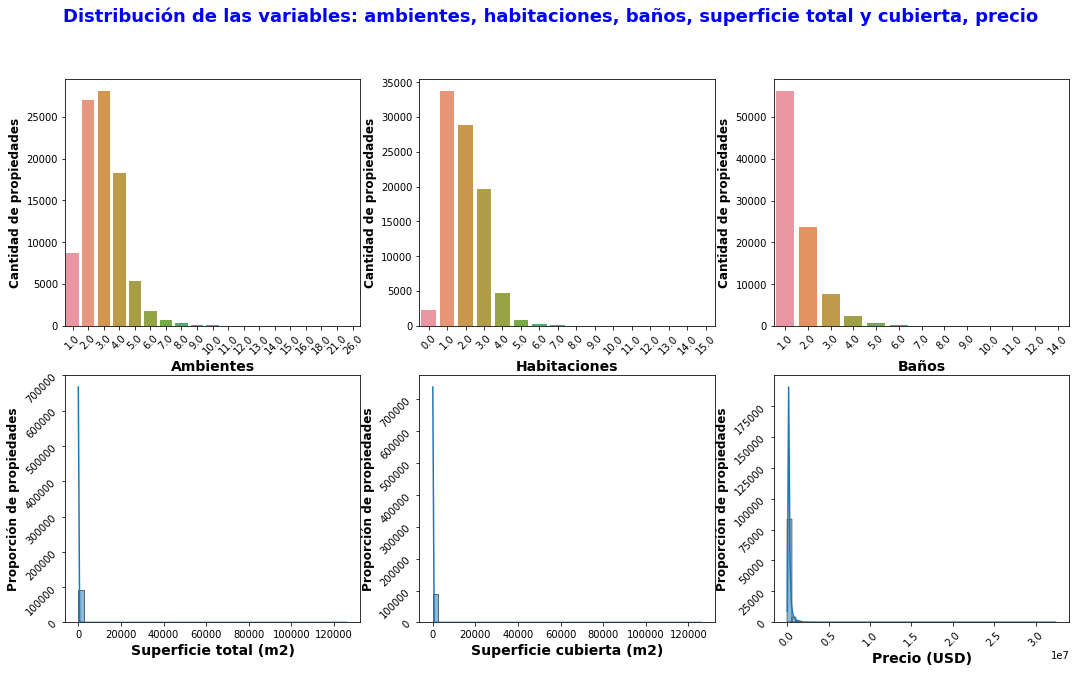

In [ ]:
Grafica_Distribuciones(data2)

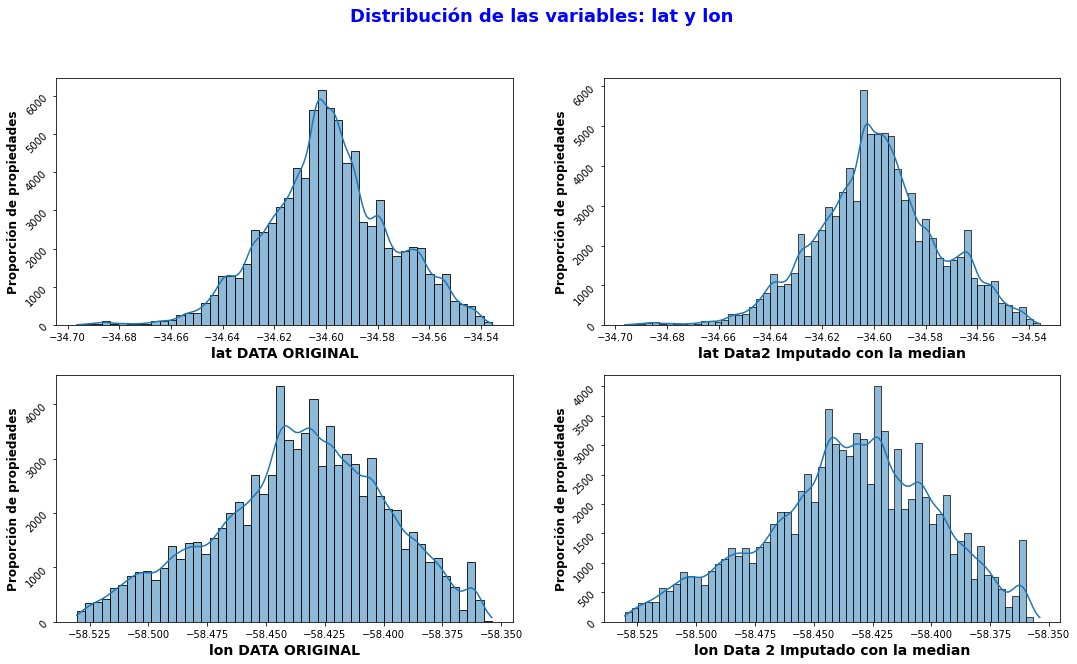

In [ ]:
plt.figure(figsize = (18,10))
plt.suptitle("Distribución de las variables: lat y lon", fontsize=18, color = "blue", fontweight = "black")

plt.subplot(2,2,1)
sns.histplot(data, x = 'lat', kde=True, bins = 50)
plt.yticks(rotation = 45)
plt.xlabel("lat DATA ORIGINAL", fontweight = "black", fontsize = 14)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,2,2)
sns.histplot(data2, x = 'lat', kde=True, bins = 60)
plt.yticks(rotation = 45)
plt.xlabel("lat Data2 Imputado con la median", fontweight = "black", fontsize = 14)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,2,3)
sns.histplot(data, x = 'lon', kde=True, bins = 50)
plt.yticks(rotation = 45)
plt.xlabel("lon DATA ORIGINAL", fontweight = "black", fontsize = 14)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,2,4)
sns.histplot(data2, x = 'lon', kde=True, bins = 60)
plt.yticks(rotation = 45)
plt.xlabel("lon Data 2 Imputado con la median", fontweight = "black", fontsize = 14)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.show()

Se puede observar una mejor distribución imputando los datos de esta forma, por lo cual se selecciona estas formas de imputación para cada variable

## **Parte A: Eliminacion y Deteccion de Outliers**

**Metodo IQR**

In [ ]:
data_2 = data2.copy()

In [ ]:
unicos = data_2["property_type"].unique()

Nota: se separó por tipo de propiedad, para obtener valores más prolijos en los rangos de cada variable.
La utilizacion del cuantil 0.00 es con motivo de evitar tener valores negativos en los datos.

***Precios*** 

In [ ]:
for x in unicos:
    Q1 = data_2[data_2["property_type"]==x]["price"].quantile(0.25)
    Q3 = data_2[data_2["property_type"]==x]["price"].quantile(0.75)
    IQR = Q3 - Q1
    precio_min = data_2[data_2["property_type"]==x]["price"].quantile(0.00)
    precio_max = Q3 + (IQR*1.5)
    print(x)
    print("el precio maximo es {}, el precio minimo es {} y el IQR {}" .format(precio_max,precio_min,IQR))
    print("")

Departamento
el precio maximo es 495150.0, el precio minimo es 6000.0 y el IQR 150100.0

PH
el precio maximo es 472500.0, el precio minimo es 27000.0 y el IQR 135000.0

Casa
el precio maximo es 815000.0, el precio minimo es 30000.0 y el IQR 230000.0



Filtramos los datos con los extremos obtenidos y graficamos

In [ ]:
dp =data_2[data_2["property_type"]=="Departamento"]
ph =data_2[data_2["property_type"]=="PH"]
ca =data_2[data_2["property_type"]=="Casa"]

In [ ]:
dp = dp[(dp.price <= 495150.0) & (dp.price >=6000.0) ]
ph = ph[(ph.price <= 472500.0) & (ph.price >=27000.0) ]
ca = ca[(ca.price <= 815000.0) & (ca.price >=30000.0) ]

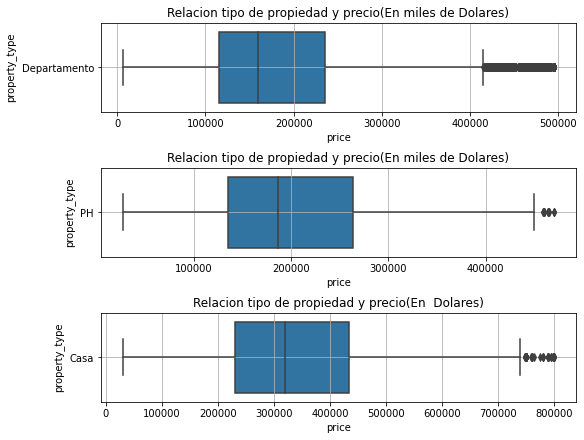

In [ ]:
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(8,6))
ax1.set_title("Relacion tipo de propiedad y precio(En miles de Dolares)")
ax2.set_title("Relacion tipo de propiedad y precio(En miles de Dolares)")
ax3.set_title("Relacion tipo de propiedad y precio(En  Dolares)")
sns.boxplot(data = dp,x="price",y="property_type",ax=ax1)
sns.boxplot(data = ph,x="price",y="property_type",ax=ax2)
sns.boxplot(data = ca,x="price",y="property_type",ax=ax3)
ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

***Superficie total*** 

In [ ]:
for x in unicos:
    Q1 = data_2[data_2["property_type"]==x]["surface_total"].quantile(0.25)
    Q3 = data_2[data_2["property_type"]==x]["surface_total"].quantile(0.75)
    IQR = Q3 - Q1
    surface_min = data_2[data_2["property_type"]==x]["surface_total"].quantile(0.00)
    surface_max = Q3 + (IQR*1.5)
    print(x)
    print("la Superficie maxima es {} y la superficie minima es {} y el IQR {}" .format(surface_max,surface_min,IQR))
    print()

Departamento
la Superficie maxima es 208.3947719049482 y la superficie minima es 12.0 y el IQR 63.757908761979266

PH
la Superficie maxima es 275.0 y la superficie minima es 20.0 y el IQR 82.0

Casa
la Superficie maxima es 584.5 y la superficie minima es 25.0 y el IQR 183.0



Filtramos los datos con los extremos obtenidos y gráficamos



In [ ]:
dp = dp[(dp.surface_total <= 208.0) & (dp.surface_total >=12.0) ]
ph = ph[(ph.surface_total <= 275.0) & (ph.surface_total >=20.0) ]
ca = ca[(ca.surface_total <= 584.0) & (ca.surface_total >=25.0) ]

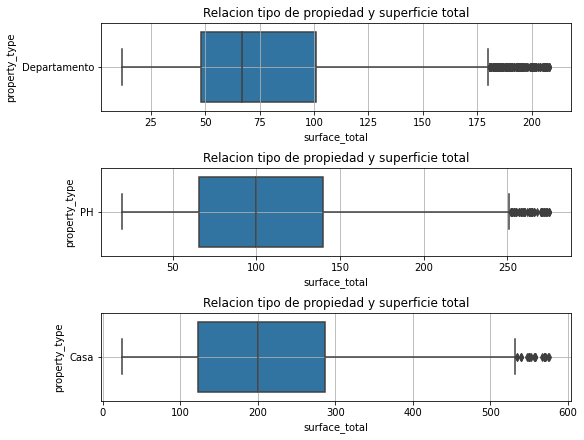

In [ ]:
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(8,6))
ax1.set_title("Relacion tipo de propiedad y superficie total")
ax2.set_title("Relacion tipo de propiedad y superficie total")
ax3.set_title("Relacion tipo de propiedad y superficie total")
sns.boxplot(data= dp, x="surface_total",y="property_type",ax=ax1)
sns.boxplot(data= ph, x="surface_total",y="property_type",ax=ax2)
sns.boxplot(data= ca, x="surface_total",y="property_type",ax=ax3)

ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

***Superficie cubierta***

In [ ]:
for x in unicos:
    Q1 = data_2[data_2["property_type"]==x]["surface_covered"].quantile(0.25)
    Q3 = data_2[data_2["property_type"]==x]["surface_covered"].quantile(0.75)
    IQR = Q3 - Q1
    surface_min = data_2[data_2["property_type"]==x]["surface_covered"].quantile(0.00)
    surface_max = Q3 + (IQR*1.5)
    print(x)
    print("la Superficie maxima es {} y la superficie minima es {} y el IQR {}" .format(surface_max,surface_min,IQR))
    print()

Departamento
la Superficie maxima es 164.47217449993866 y la superficie minima es 1.0 y el IQR 48.188869799975464

PH
la Superficie maxima es 218.0 y la superficie minima es 1.0 y el IQR 64.0

Casa
la Superficie maxima es 439.2166953000368 y la superficie minima es 25.0 y el IQR 138.81113020002454



Filtramos los datos con los extremos obtenidos y gráficamos

In [ ]:
dp = dp[(dp.surface_covered <= 165) & (dp.surface_covered >= 1) ]
ph = ph[(ph.surface_covered <= 218) & (ph.surface_covered >= 1) ]
ca = ca[(ca.surface_covered <= 439) & (ca.surface_covered >= 25) ]

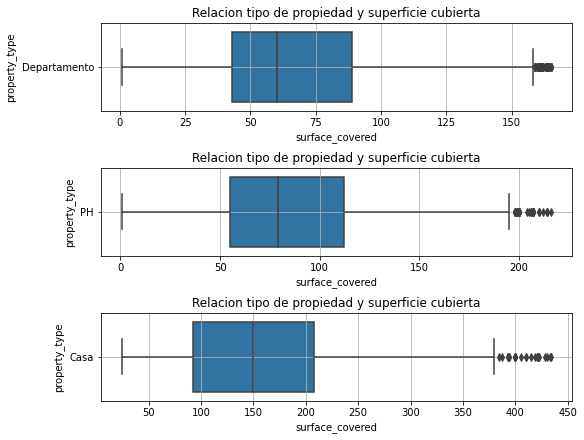

In [ ]:
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(8,6))
ax1.set_title("Relacion tipo de propiedad y superficie cubierta")
ax2.set_title("Relacion tipo de propiedad y superficie cubierta")
ax3.set_title("Relacion tipo de propiedad y superficie cubierta")
sns.boxplot(data= dp, x="surface_covered",y="property_type",ax=ax1)
sns.boxplot(data= ph, x="surface_covered",y="property_type",ax=ax2)
sns.boxplot(data= ca, x="surface_covered",y="property_type",ax=ax3)

ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

In [ ]:
conc_1=[dp,ph,ca]
data_2 = pd.concat(conc_1)
print("Tamaño del conjunto de datos filtrado:", data_2.shape)

Tamaño del conjunto de datos filtrado: (81587, 19)


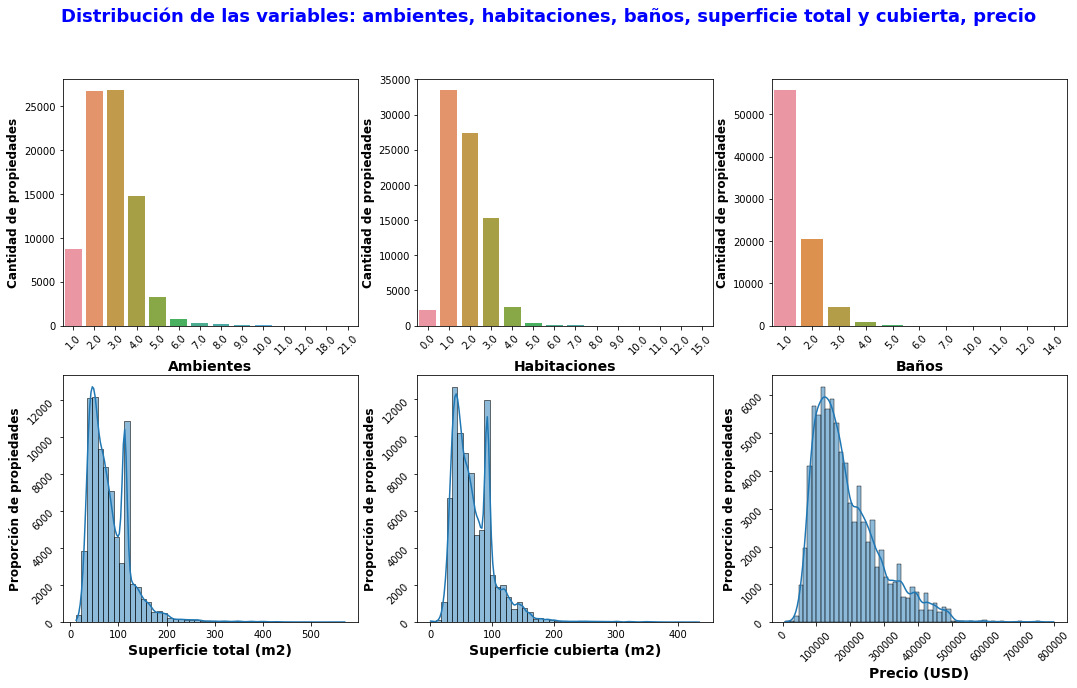

In [ ]:
Grafica_Distribuciones (data_2)

***Ambientes (Rooms)***

In [ ]:
rooms_min_list=[]
rooms_max_list=[]

for x in unicos:
    Q1 = data_2[data_2["property_type"]==x]["rooms"].quantile(0.25)
    Q3 = data_2[data_2["property_type"]==x]["rooms"].quantile(0.75)
    IQR = Q3 - Q1
    lim_min = data_2[data_2["property_type"]==x]["rooms"].quantile(0.00)
    lim_max = Q3 + (IQR*1.5)

    rooms_min_list.append(lim_min)
    rooms_max_list.append(lim_max)

    print(x)
    print("El N maxima de ambientes es {} y El N minimo de ambientes es {} y el IQR {}" .format(lim_max, lim_min,IQR))
    print()

Departamento
El N maxima de ambientes es 4.5 y El N minimo de ambientes es 1.0 y el IQR 1.0

PH
El N maxima de ambientes es 5.5 y El N minimo de ambientes es 1.0 y el IQR 1.0

Casa
El N maxima de ambientes es 6.5 y El N minimo de ambientes es 1.0 y el IQR 1.0



In [ ]:
#Import math library
for i in rooms_max_list:
    rooms_floor_max = math.floor(i)
    print(rooms_floor_max)

4
5
6


Filtramos los datos con los extremos obtenidos y gráficamos

In [ ]:
dp1 = dp.copy()
ph1 = ph.copy()
ca1 = ca.copy()

In [ ]:
dp1 = dp1[(dp1.rooms <= 4) & (dp1.rooms>= 1) ]
ph1 = ph1[(ph1.rooms <= 5) & (ph1.rooms >= 1) ]
ca1 = ca1[(ca1.rooms<= 6) & (ca1.rooms >= 1) ]

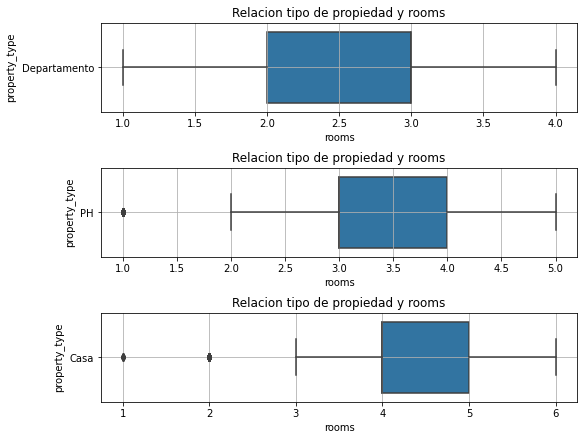

In [ ]:
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(8,6))
ax1.set_title("Relacion tipo de propiedad y rooms")
ax2.set_title("Relacion tipo de propiedad y rooms")
ax3.set_title("Relacion tipo de propiedad y rooms")
sns.boxplot(data= dp1, x="rooms",y="property_type",ax=ax1)
sns.boxplot(data= ph1, x="rooms",y="property_type",ax=ax2)
sns.boxplot(data= ca1, x="rooms",y="property_type",ax=ax3)

ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

***Habitaciones (bedrooms)***

In [ ]:
bedr_min_list=[]
bedr_max_list=[]

for x in unicos:
    Q1 = data_2[data_2["property_type"]==x]["bedrooms"].quantile(0.25)
    Q3 = data_2[data_2["property_type"]==x]["bedrooms"].quantile(0.75)
    IQR = Q3 - Q1
    lim_min = data_2[data_2["property_type"]==x]["bedrooms"].quantile(0.0)
    lim_max = Q3 + (IQR*1.5)

    bedr_min_list.append(lim_min)
    bedr_max_list.append(lim_max)

    print(x)
    print("El N maxima de habitaciones es {} y El N minimo de habitaciones es {} y el IQR {}" .format(lim_max, lim_min,IQR))
    print()

Departamento
El N maxima de habitaciones es 3.5 y El N minimo de habitaciones es 0.0 y el IQR 1.0

PH
El N maxima de habitaciones es 4.5 y El N minimo de habitaciones es 0.0 y el IQR 1.0

Casa
El N maxima de habitaciones es 5.5 y El N minimo de habitaciones es 0.0 y el IQR 1.0



In [ ]:
for i in bedr_max_list:
    br_floor_max = math.floor(i)
    print(br_floor_max)

3
4
5


Filtramos los datos con los extremos obtenidos y gráficamos

In [ ]:
dp1 = dp1[(dp1.bedrooms<= 3) & (dp1.bedrooms >= 0) ]
ph1 = ph1[(ph1.bedrooms <= 4) & (ph1.bedrooms >= 0) ]
ca1 = ca1[(ca1.bedrooms <= 5) & (ca1.bedrooms >= 0) ]

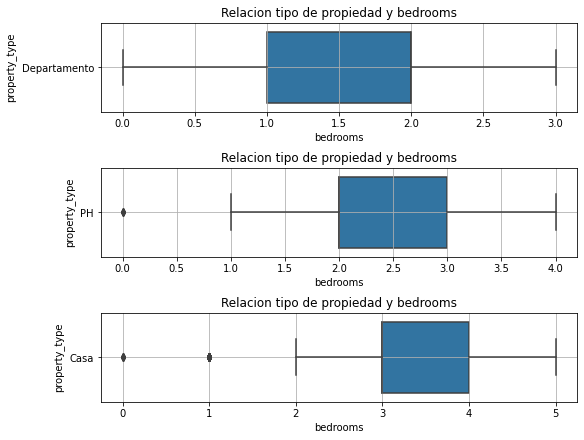

In [ ]:
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(8,6))
ax1.set_title("Relacion tipo de propiedad y bedrooms")
ax2.set_title("Relacion tipo de propiedad y bedrooms")
ax3.set_title("Relacion tipo de propiedad y bedrooms")
sns.boxplot(data= dp1, x="bedrooms",y="property_type",ax=ax1)
sns.boxplot(data= ph1, x="bedrooms",y="property_type",ax=ax2)
sns.boxplot(data= ca1, x="bedrooms",y="property_type",ax=ax3)

ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

***Baños (bathrooms)***

In [ ]:
bathr_min_list=[]
bathr_max_list=[]

for x in unicos:
    Q1 = data_2[data_2["property_type"]==x]["bathrooms"].quantile(0.25)
    Q3 = data_2[data_2["property_type"]==x]["bathrooms"].quantile(0.75)
    IQR = Q3 - Q1
    lim_min = data_2[data_2["property_type"]==x]["bathrooms"].quantile(0.0)
    lim_max = Q3 + (IQR*1.5)

    bathr_min_list.append(lim_min)
    bathr_max_list.append(lim_max)

    print(x)
    print("El N maxima de baños es {} y El N minimo de baños es {} y el IQR {}" .format(lim_max, lim_min,IQR))
    print()

Departamento
El N maxima de baños es 3.5 y El N minimo de baños es 1.0 y el IQR 1.0

PH
El N maxima de baños es 3.5 y El N minimo de baños es 1.0 y el IQR 1.0

Casa
El N maxima de baños es 4.5 y El N minimo de baños es 1.0 y el IQR 1.0



In [ ]:
for i in bathr_max_list:
    bathr_floor_max = math.floor(i)
    print(bathr_floor_max)

3
3
4


Filtramos los datos con los extremos obtenidos y gráficamos

In [ ]:
dp1 = dp1[(dp1.bathrooms <= 3) & (dp1.bathrooms >= 1) ]
ph1 = ph1[(ph1.bathrooms <= 3) & (ph1.bathrooms >= 1) ]
ca1 = ca1[(ca1.bathrooms <= 4) & (ca1.bathrooms >= 1) ]

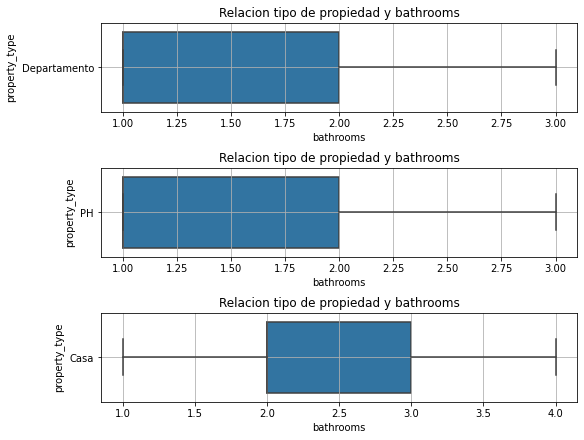

In [ ]:
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(8,6))
ax1.set_title("Relacion tipo de propiedad y bathrooms")
ax2.set_title("Relacion tipo de propiedad y bathrooms")
ax3.set_title("Relacion tipo de propiedad y bathrooms")
sns.boxplot(data= dp1, x="bathrooms",y="property_type",ax=ax1)
sns.boxplot(data= ph1, x="bathrooms",y="property_type",ax=ax2)
sns.boxplot(data= ca1, x="bathrooms",y="property_type",ax=ax3)

ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

In [ ]:
conc_2=[dp1,ph1,ca1]
data_3 = pd.concat(conc_2)
print("Tamaño del conjunto de datos filtrado:", data_3.shape)

Tamaño del conjunto de datos filtrado: (78329, 19)


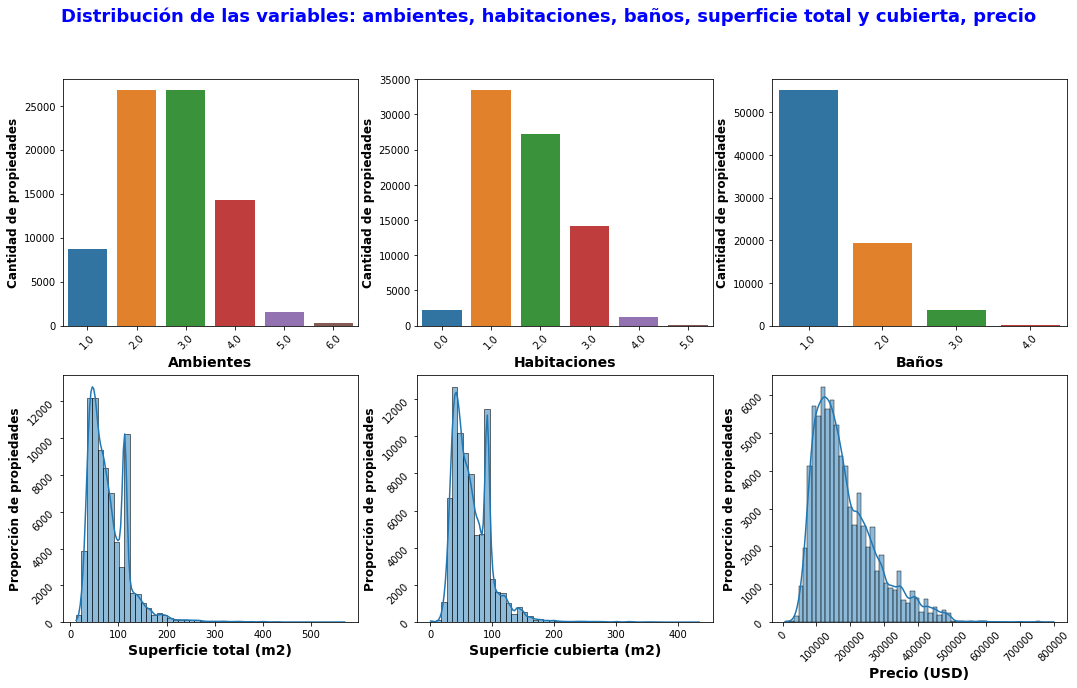

In [ ]:
Grafica_Distribuciones(data_3)

Observamos que la distribución se mantiene por lo cual seleccionamos estos datos y continuamos con el procesamiento de los datos.

## **Parte A: Encoding**

In [ ]:
data_4 = data_3.copy()

In [ ]:
data_4.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
11,2019-10-17,2019-10-26,2019-10-17,-34.603683,-58.381557,Argentina,Capital Federal,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,USD,Venta Departamento en Boedo Capital Federal Ga...,"Departamento en Venta, 2 ambientes espectacula...",Departamento,Venta
12,2019-10-17,2019-12-19,2019-10-17,-34.630349,-58.417223,Argentina,Capital Federal,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,USD,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",Departamento,Venta
20,2019-10-17,2019-10-24,2019-10-17,-34.608246,-58.444262,Argentina,Capital Federal,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,USD,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento,Venta
21,2019-10-17,2019-10-28,2019-10-17,-34.603890,-58.410998,Argentina,Capital Federal,Abasto,1.0,1.0,1.0,22.0,22.0,48000.0,USD,Monoambiente Vista Abierta,Excelente Inversion o 1era vivienda en renovad...,Departamento,Venta
22,2019-10-17,2019-11-13,2019-10-17,-34.626240,-58.462078,Argentina,Capital Federal,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,USD,Listo para mudarte- Excelente 2 ambientes ampl...,Inmejorable ubicación a tan solo 2 cuadras del...,Departamento,Venta


Realizamos encoding para la variable property type

In [ ]:
Labelencoder= LabelEncoder()
Labelencoder.fit(data_4["property_type"])
data_4["Tipo_propiedad"] = Labelencoder.transform(data_4["property_type"])
#data_4.drop("property_type",axis=1,inplace=True)

In [ ]:
list(Labelencoder.classes_)

['Casa', 'Departamento', 'PH']

In [ ]:
Labelencoder.transform(["Casa", "Departamento", "PH"])

array([0, 1, 2])

In [ ]:
data_4.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,Tipo_propiedad
11,2019-10-17,2019-10-26,2019-10-17,-34.603683,-58.381557,Argentina,Capital Federal,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,USD,Venta Departamento en Boedo Capital Federal Ga...,"Departamento en Venta, 2 ambientes espectacula...",Departamento,Venta,1
12,2019-10-17,2019-12-19,2019-10-17,-34.630349,-58.417223,Argentina,Capital Federal,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,USD,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",Departamento,Venta,1
20,2019-10-17,2019-10-24,2019-10-17,-34.608246,-58.444262,Argentina,Capital Federal,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,USD,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento,Venta,1
21,2019-10-17,2019-10-28,2019-10-17,-34.603890,-58.410998,Argentina,Capital Federal,Abasto,1.0,1.0,1.0,22.0,22.0,48000.0,USD,Monoambiente Vista Abierta,Excelente Inversion o 1era vivienda en renovad...,Departamento,Venta,1
22,2019-10-17,2019-11-13,2019-10-17,-34.626240,-58.462078,Argentina,Capital Federal,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,USD,Listo para mudarte- Excelente 2 ambientes ampl...,Inmejorable ubicación a tan solo 2 cuadras del...,Departamento,Venta,1


Una vez toda la exploración y transformación de datos tenemos listo nuestros dataset para la aplicación de los modelos.

In [ ]:
data_4.shape

(78329, 20)

## **Reentreno del mejor modelo utilizado en el Proyecto 1**

Eliminamos la variables que no nos interesan y que no vamos a utilizar

In [ ]:
data_5 = data_4.drop(['start_date','end_date',"created_on",'currency','title','description','operation_type','property_type','l3','l1','l2'],axis=1)
data_5.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Tipo_propiedad
11,-34.603683,-58.381557,2.0,1.0,1.0,68.0,59.0,149000.0,1
12,-34.630349,-58.417223,2.0,1.0,1.0,50.0,44.0,115000.0,1
20,-34.608246,-58.444262,2.0,1.0,1.0,31.0,31.0,75000.0,1
21,-34.603890,-58.410998,1.0,1.0,1.0,22.0,22.0,48000.0,1
22,-34.626240,-58.462078,2.0,1.0,1.0,45.0,45.0,95000.0,1


In [ ]:
X = data_5.drop(columns=["price"])
y = data_5["price"].values

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((54830, 8), (23499, 8))

Observamos los valores obtenidos anteriormente del proyecto 1


**PROYECTO 1 CON OPTIMIZACION PROYECTO 1** Profundidad 10

*  R2 en Train: 0.92
*  R2 en test: 0.87
---

> Bloc con sangría


*  RMSE en train: 80049
*  RMSE en test: 100117

Ahora, con nuestro nuevo dataset, entrenamos el arból de decisones con diferentes profundidades 

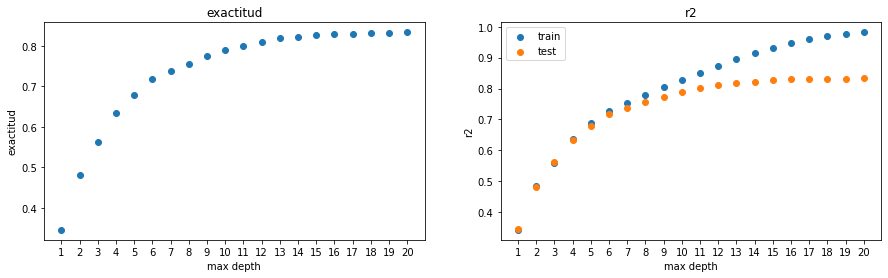

In [ ]:
MAX_DEPTH_range = range(1, 21)
scores = []
arbol_r2_train_pred=[]
arbol_r2_test_pred=[]

for k in MAX_DEPTH_range:
    new_arbol_regressor = DecisionTreeRegressor(max_depth=k,random_state=42)
    new_arbol_regressor.fit(X_train, y_train)
    scores.append(new_arbol_regressor.score(X_test, y_test))
    
    y_train_pred = new_arbol_regressor.predict(X_train)
    arbol_r2_train = metrics.r2_score(y_train, y_train_pred)
    arbol_r2_train_pred.append(arbol_r2_train)
    
    y_test_pred = new_arbol_regressor.predict(X_test)
    arbol_r2_test = metrics.r2_score(y_test, y_test_pred)
    arbol_r2_test_pred.append(arbol_r2_test)
    

fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.scatter(MAX_DEPTH_range,scores,marker="o")
ax2.scatter(MAX_DEPTH_range,arbol_r2_train_pred,marker="o",label="train")
ax2.scatter(MAX_DEPTH_range,arbol_r2_test_pred,marker="o",label="test")

ax1.set_xticks(MAX_DEPTH_range)
ax2.set_xticks(MAX_DEPTH_range)

ax2.legend()

ax1.set_title('exactitud')
ax1.set_xlabel('max depth')
ax1.set_ylabel('exactitud')

ax2.set_title('r2')
ax2.set_xlabel('max depth')
ax2.set_ylabel('r2')

plt.show()

**Parametros optimizados del proyecto 1**

In [ ]:
arbol_proyecto1 = DecisionTreeRegressor(max_depth= 10,random_state=42)
arbol_proyecto1.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

**Parametros optimizados del proyecto 2**

In [ ]:
arbol_proyecto2 = DecisionTreeRegressor(max_depth= 11,random_state=42)
arbol_proyecto2.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

## **Función**

Creamos una función auxiliar para evaluar modelos. Imprime en pantalla los errores RECM y R2 para train y test. Muestra dos gráficos:
1. Histograma de errores en train y en test.
2. Precio en test contra precio predicho.

Además entrega un diccionario con los errores almacenados.

In [ ]:
def evaluar_regresion(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train= metrics.r2_score(y_train, y_train_pred)
    r2_test= metrics.r2_score(y_test, y_test_pred)
    print(str(model).upper())
    print("ERROR  TRAIN     TEST    ")
    print("------ --------  --------")
    print("%-6s %-9.2f %.2f "%('RMSE:',rmse_train.round(2),rmse_test.round(2)))
    print("%-10s %-9.2f %.2f "%('R2:',r2_train.round(2),r2_test.round(2)))
    

    #expy_train = np.exp(y_train)
    #expy_train_pred = np.exp(y_train_pred)
    #expy_test = np.exp(y_test)
    #expy_test_pred = np.exp(y_test_pred)
    
    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (18,6))
 
    plt.subplot(1,2,1)
    sns.histplot((y_train - y_train_pred), bins = 20, label = 'train', color='orange', kde= True, stat="density")
    sns.histplot((y_test - y_test_pred), bins = 20, label = 'test', color='blue', kde = True, stat="density")
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test, y_test_pred, s =2,c='blue')

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show();
    return {'RMSE':[rmse_train,rmse_test], 'R2':[r2_train,r2_test]}

DECISIONTREEREGRESSOR(CCP_ALPHA=0.0, CRITERION='MSE', MAX_DEPTH=10,
                      MAX_FEATURES=NONE, MAX_LEAF_NODES=NONE,
                      MIN_IMPURITY_DECREASE=0.0, MIN_IMPURITY_SPLIT=NONE,
                      MIN_SAMPLES_LEAF=1, MIN_SAMPLES_SPLIT=2,
                      MIN_WEIGHT_FRACTION_LEAF=0.0, PRESORT='DEPRECATED',
                      RANDOM_STATE=42, SPLITTER='BEST')
ERROR  TRAIN     TEST    
------ --------  --------
RMSE:  39021.78  42945.89 
R2:        0.83      0.79 


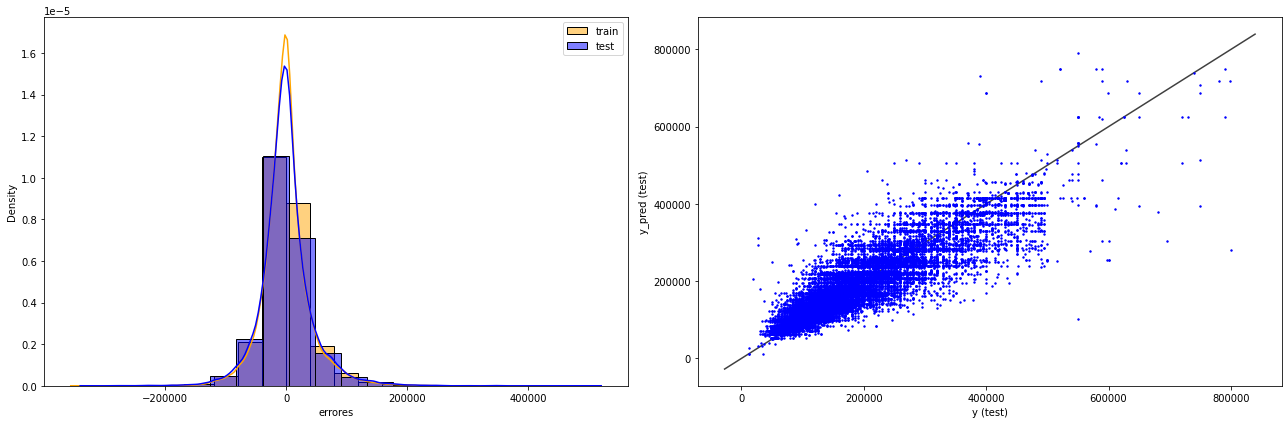

In [ ]:
errores_arbol_proyecto1 = evaluar_regresion(arbol_proyecto1, X_train, X_test, y_train, y_test)

DECISIONTREEREGRESSOR(CCP_ALPHA=0.0, CRITERION='MSE', MAX_DEPTH=11,
                      MAX_FEATURES=NONE, MAX_LEAF_NODES=NONE,
                      MIN_IMPURITY_DECREASE=0.0, MIN_IMPURITY_SPLIT=NONE,
                      MIN_SAMPLES_LEAF=1, MIN_SAMPLES_SPLIT=2,
                      MIN_WEIGHT_FRACTION_LEAF=0.0, PRESORT='DEPRECATED',
                      RANDOM_STATE=42, SPLITTER='BEST')
ERROR  TRAIN     TEST    
------ --------  --------
RMSE:  36295.05  41804.46 
R2:        0.85      0.80 


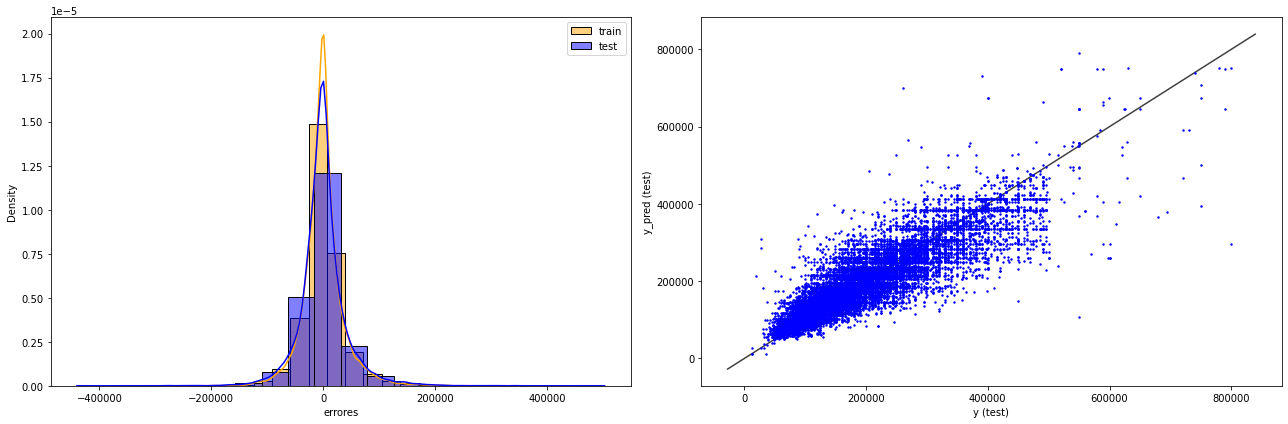

In [ ]:
errores_arbol_proyecto2 = evaluar_regresion(arbol_proyecto2, X_train, X_test, y_train, y_test)

In [ ]:
type(errores_arbol_proyecto1)

dict

In [ ]:
l0=['80049', '0.92']
l1=[errores_arbol_proyecto1[key][0].round(2) for key in errores_arbol_proyecto1]
l2=[errores_arbol_proyecto2[key][0].round(2) for key in errores_arbol_proyecto2]

names=['Arbol de Deciciones(10) de P1 CON DATA P1', 'Arbol de Deciciones(10) de P1 CON DATA P2', 'Arbol de Deciciones(11) de P2 CON DATA P2']

df_errores_train = pd.DataFrame(np.array([l0,l1,l2]), columns=['RMSE', 'R2'])
df_errores_train.insert(0,'Regresor',names,True)

print('Errores en train')
print(df_errores_train)
print(' ')

l0=['100117', '0.87']
l1=[errores_arbol_proyecto1[key][1].round(2) for key in errores_arbol_proyecto1]
l2=[errores_arbol_proyecto2[key][1].round(2) for key in errores_arbol_proyecto2]

df_errores_test = pd.DataFrame(np.array([l0,l1,l2]), columns=['RMSE','R2'])
df_errores_test.insert(0,'Regresor',names,True)
print('Errores en test')
print(df_errores_test)

Errores en train
                                    Regresor      RMSE    R2
0  Arbol de Deciciones(10) de P1 CON DATA P1     80049  0.92
1  Arbol de Deciciones(10) de P1 CON DATA P2  39021.78  0.83
2  Arbol de Deciciones(11) de P2 CON DATA P2  36295.05  0.85
 
Errores en test
                                    Regresor      RMSE    R2
0  Arbol de Deciciones(10) de P1 CON DATA P1    100117  0.87
1  Arbol de Deciciones(10) de P1 CON DATA P2  42945.89  0.79
2  Arbol de Deciciones(11) de P2 CON DATA P2  41804.46   0.8


## **Análsis**

Se pueden observar mejoras en los resultados obtenidos tanto para train como para test, logrando un avance increible en el RMSE respecto al modelo optimizado del proyecto 1 al aplicar el nuevo dataset del proyecto 2, en los cuales se realizó una imputación de datos y se trataron todos los outliers de todas las variables seleccionadas.

Por lo que ahora nuestro nuevo Bencharmark será el del Proyecto 2.

***Benchmark:***


**PROYECTO 2 CON OPTIMIZACION PROYECTO 2** Profundidad 11

* R2 en Train: 0.85
* R2 en test: 0.80
--------------------------
* RMSE en train: 36295.05
* RMSE en test: 41804.46



# **Parte B**

Se entrenarán distintos modelos de ensamble buscando mejorar nuestros resultados obtenidos hasta el momento. 

Los modelos a entrenar son:

* ***RandomForestRegressor***
* ***XGBoost***


## **Random Forest**

Comenzamos analizando un ```RandomForestRegressor```.



In [ ]:
rf = RandomForestRegressor(n_jobs=-1, random_state=10)

In [ ]:
print('--------------------------------------------------------')
print('BAGGING: RandomForestRegressor')
print('--------------------------------------------------------')
rmse = cross_val_score(rf, X_train, y_train, cv=9, scoring='neg_root_mean_squared_error', n_jobs=-1)
print(f'RMSE: { -rmse.mean().round(2) } (+/- { rmse.std().round(2) })') #RAÍZ DEL ERROR CUADRÁTICO MEDIO
r2 = cross_val_score(rf, X_train, y_train, cv=9, scoring='r2', n_jobs=-1)
print(f'r2: { r2.mean().round(2) }\n') #COEFICIENTE DE DETERMINACIÓN

--------------------------------------------------------
BAGGING: RandomForestRegressor
--------------------------------------------------------
RMSE: 30608.32 (+/- 527.95)
r2: 0.89



In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

RANDOMFORESTREGRESSOR(BOOTSTRAP=TRUE, CCP_ALPHA=0.0, CRITERION='MSE',
                      MAX_DEPTH=NONE, MAX_FEATURES='AUTO', MAX_LEAF_NODES=NONE,
                      MAX_SAMPLES=NONE, MIN_IMPURITY_DECREASE=0.0,
                      MIN_IMPURITY_SPLIT=NONE, MIN_SAMPLES_LEAF=1,
                      MIN_SAMPLES_SPLIT=2, MIN_WEIGHT_FRACTION_LEAF=0.0,
                      N_ESTIMATORS=100, N_JOBS=-1, OOB_SCORE=FALSE,
                      RANDOM_STATE=10, VERBOSE=0, WARM_START=FALSE)
ERROR  TRAIN     TEST    
------ --------  --------
RMSE:  12519.83  30269.22 
R2:        0.98      0.90 


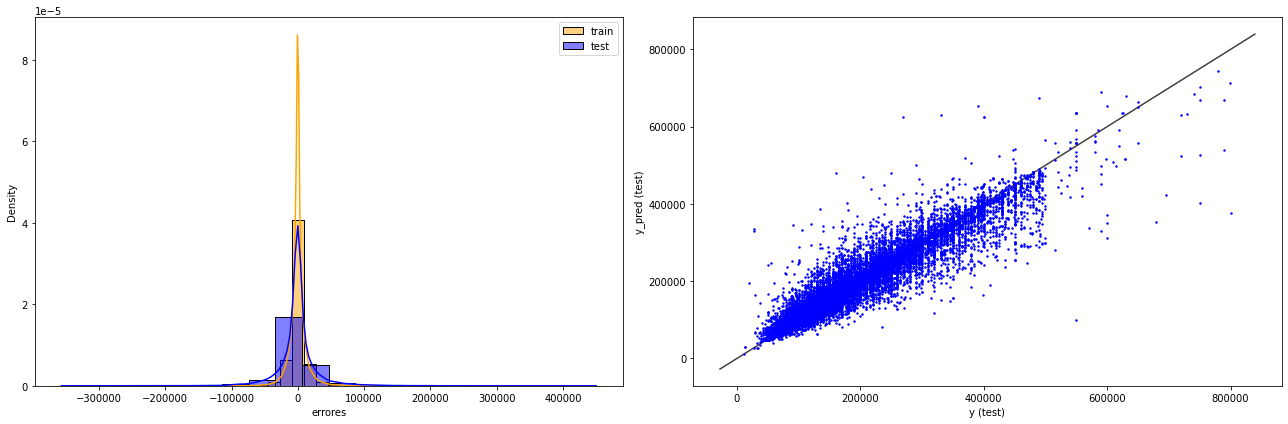

In [ ]:
errores_rf = evaluar_regresion(rf, X_train, X_test, y_train, y_test)

Entrenando un modelo RandomForestRegressor con sus parámetros por defectos obtenemos la menor varianza en la métrica RMSE y el menor error de la métrica r2, sin embargo se encuentra sobreajustado a nuestros datos de entrenamiento.

Para encontrar los mejores parámetros para nuestro modelo vamos a utilizar la técnica RandomizedSearchCV. Antes de comenzar, vamos a analizar la cantidad de árboles necesarios para nuestro modelo al igual que la profundidad máxima del mismo.

*Análisis de la cantidad de arboles necesarios*

In [ ]:
from sklearn.model_selection import validation_curve

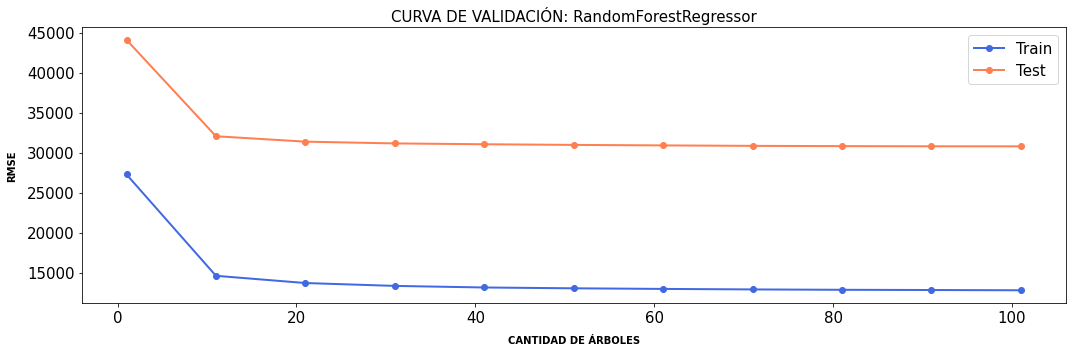

In [ ]:
estimators = range(1,111,10)
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=10)
train_scores, test_scores = validation_curve(cv=7, estimator=rf, X=X_train, y=y_train, n_jobs=-1,
                                             param_name='n_estimators', param_range =estimators,
                                             scoring='neg_root_mean_squared_error')
plt.figure(figsize=(15,5), tight_layout=True)
plt.plot(estimators, -pd.Series(train_scores.mean(axis=1), index=estimators), 'o-', color='Royalblue', label='Train',
         linewidth=2)
plt.plot(estimators, -pd.Series(test_scores.mean(axis=1), index=estimators), 'o-', color='Coral', label='Test',
         linewidth=2)
plt.title('CURVA DE VALIDACIÓN: RandomForestRegressor', fontsize=15)
plt.legend(fancybox=True, fontsize=15, frameon=True, loc='upper right')
plt.xlabel('CANTIDAD DE ÁRBOLES', fontsize=10, labelpad=10, weight='bold')
plt.xticks(fontsize=15)
plt.ylabel('RMSE', fontsize=10, labelpad=10, weight='bold')
plt.yticks(fontsize=15)
plt.show()

Como se puede observar, a partir de 20 árboles se estabiliza el aprendizaje de nuestro modelo y el error del mismo deja de disminuir de manera pronunciada. 

*Análisis de la profundidad máxima de nuestro modelo*

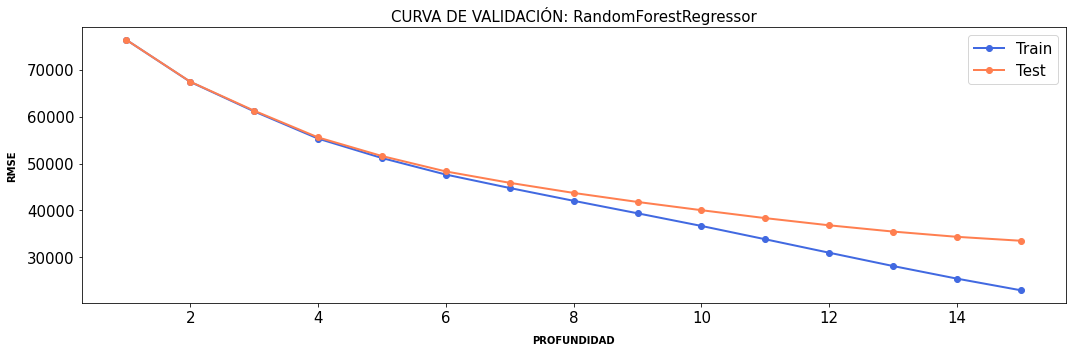

In [ ]:
depths = range(1,16)
rf = RandomForestRegressor(bootstrap=True, n_estimators=20, n_jobs=-1, random_state=10)
train_scores, test_scores = validation_curve(cv=7, estimator=rf, X=X_train, y=y_train, n_jobs=-1,
                                             param_name='max_depth', param_range=depths,
                                             scoring='neg_root_mean_squared_error')
plt.figure(figsize=(15,5), tight_layout=True)
plt.plot(depths, -pd.Series(train_scores.mean(axis=1), index=depths), 'o-', color='Royalblue', label='Train',
         linewidth=2)
plt.plot(depths, -pd.Series(test_scores.mean(axis=1), index=depths), 'o-', color='Coral', label='Test',
         linewidth=2)
plt.title('CURVA DE VALIDACIÓN: RandomForestRegressor', fontsize=15)
plt.legend(fancybox=True, fontsize=15, frameon=True, loc='upper right')
plt.xlabel('PROFUNDIDAD', fontsize=10, labelpad=10, weight='bold')
plt.xticks(fontsize=15)
plt.ylabel('RMSE', fontsize=10, labelpad=10, weight='bold')
plt.yticks(fontsize=15)
plt.show()

Con una profundidad cercana a 8 nuestro modelo parece estar en equilibro, a partir de ahí, se empieza a evidenciar sobreajuste en nuestro modelo.

Elegimos la cantidad de árboles y profundidad, continuamos realizando el RandomSearch.

In [ ]:
params = {
    'ccp_alpha': [0, .002, .004, .006, .008, .01, .02, .04, .06, .08, .1, .2, .4, .6, .8, 1, 5],
    'max_features': ['auto', 'log2', 'sqrt', .1, .2, .3, .4, .5, .6, .7, .8, .9],
    'max_leaf_nodes': [None, 4, 6, 8, 10, 12, 15],
    'max_samples': [None, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
    'min_samples_leaf': stats.randint(1, 15),
    'min_samples_split': stats.randint(2, 15),
    'oob_score': [True, False],
    'warm_start': [True, False]
         }

In [ ]:
search = RandomizedSearchCV(cv=7, estimator=RandomForestRegressor(bootstrap=True, max_depth=8, n_estimators=20,
                                                                  n_jobs=-1, random_state=10),
                            n_iter=200, n_jobs=-1, param_distributions=params, random_state=10,
                            scoring='neg_root_mean_squared_error')
search.fit(X_train, y_train)

RandomizedSearchCV(cv=7, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse', max_depth=8,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=20, n_jobs=-1,
                                                   oob_score=False,
      

Corroboramos los mejores parámetros para nuestro modelo.

In [ ]:
print('Mejores parámetros:', search.best_params_)
print('Mejor R2: ' + str(round(search.best_score_, 4)))

Mejores parámetros: {'ccp_alpha': 0.01, 'max_features': 0.8, 'max_leaf_nodes': None, 'max_samples': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 6, 'oob_score': False, 'warm_start': False}
Mejor R2: -43353.1693


Y, finalmente, entrenamos el modelo con los mejores parámetros que se obtuvieron.

In [ ]:
rf_best = RandomForestRegressor(bootstrap=True, ccp_alpha=.001, max_depth=8, max_features=.8, max_samples = 0.5, min_samples_leaf=3,
                                 min_samples_split=6, n_estimators=20, n_jobs=-1, random_state=10)



print('--------------------------------------------------------')
print('BAGGING: RandomForestRegressor')
print('--------------------------------------------------------')
rmse = cross_val_score(rf_best , X_train, y_train, cv=9, scoring='neg_root_mean_squared_error', n_jobs=-1)
print(f'RMSE: { -rmse.mean().round(2) } (+/- { rmse.std().round(2) })') #RAÍZ DEL ERROR CUADRÁTICO MEDIO
r2 = cross_val_score(rf_best, X_train, y_train, cv=9, scoring='r2', n_jobs=-1)
print(f'r2: { r2.mean().round(2) }\n') #COEFICIENTE DE DETERMINACIÓN


--------------------------------------------------------
BAGGING: RandomForestRegressor
--------------------------------------------------------
RMSE: 43337.12 (+/- 461.58)
r2: 0.79



In [ ]:
rf_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.001, criterion='mse',
                      max_depth=8, max_features=0.8, max_leaf_nodes=None,
                      max_samples=0.5, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

RANDOMFORESTREGRESSOR(BOOTSTRAP=TRUE, CCP_ALPHA=0.001, CRITERION='MSE',
                      MAX_DEPTH=8, MAX_FEATURES=0.8, MAX_LEAF_NODES=NONE,
                      MAX_SAMPLES=0.5, MIN_IMPURITY_DECREASE=0.0,
                      MIN_IMPURITY_SPLIT=NONE, MIN_SAMPLES_LEAF=3,
                      MIN_SAMPLES_SPLIT=6, MIN_WEIGHT_FRACTION_LEAF=0.0,
                      N_ESTIMATORS=20, N_JOBS=-1, OOB_SCORE=FALSE,
                      RANDOM_STATE=10, VERBOSE=0, WARM_START=FALSE)
ERROR  TRAIN     TEST    
------ --------  --------
RMSE:  42122.59  43625.59 
R2:        0.80      0.78 


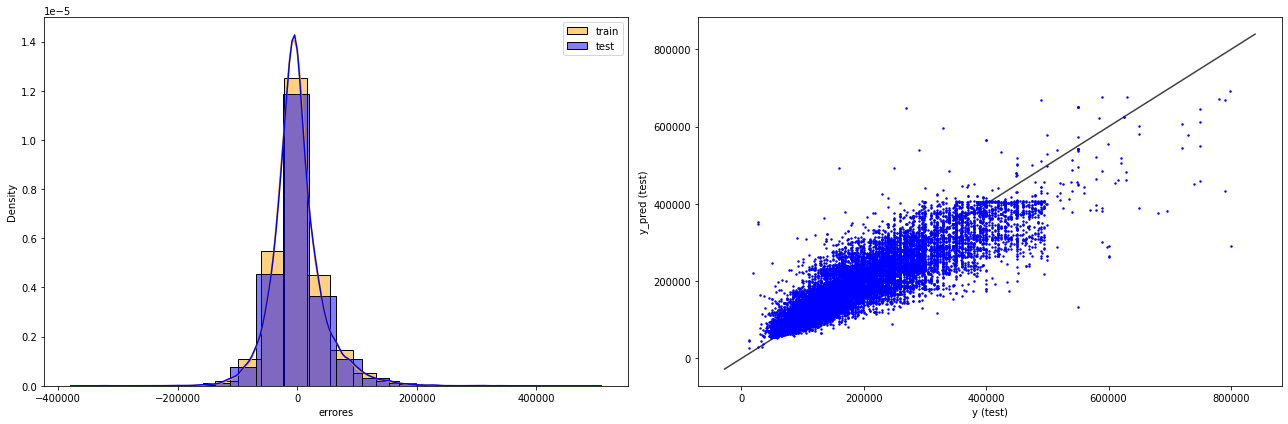

In [ ]:
errores_rf_best = evaluar_regresion(rf_best, X_train, X_test, y_train, y_test)

In [ ]:
l0=[errores_arbol_proyecto2[key][0].round(2) for key in errores_arbol_proyecto2]
l1=[errores_rf[key][0].round(2) for key in errores_rf]
l2=[errores_rf_best[key][0].round(2) for key in errores_rf_best]

names=['Benchmark', 'Random Forest', 'Random Forest Optimizado']

df_errores_train = pd.DataFrame(np.array([l0,l1,l2]), columns=['RMSE', 'R2'])
df_errores_train.insert(0,'Regresor',names,True)

print('Errores en train')
print(df_errores_train)
print(' ')

l0=[errores_arbol_proyecto2[key][1].round(2) for key in errores_arbol_proyecto2]
l1=[errores_rf[key][1].round(2) for key in errores_rf]
l2=[errores_rf_best[key][1].round(2) for key in errores_rf_best]

df_errores_test = pd.DataFrame(np.array([l0,l1,l2]), columns=['RMSE','R2'])
df_errores_test.insert(0,'Regresor',names,True)
print('Errores en test')
print(df_errores_test)

Errores en train
                   Regresor      RMSE    R2
0                 Benchmark  36295.05  0.85
1             Random Forest  12519.83  0.98
2  Random Forest Optimizado  42122.59  0.80
 
Errores en test
                   Regresor      RMSE    R2
0                 Benchmark  41804.46  0.80
1             Random Forest  30269.22  0.90
2  Random Forest Optimizado  43625.59  0.78


## **Análisis**

Como vismo anteriormente con RandomForest con los datos por defeto, obtenemos el menor error de la métrica r2, sin embargo se encuentra sobreajustado a nuestros datos de entrenamiento.

A diferencia del RandomForest optimizado, donde conseguimos un mayor error r2, sin embargo un poco menos de sobreajuste.

## **XGBoost: Extreme Gradient Boosting**

Analizando el modelo ```XGBoost```

In [ ]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, seed=10)

In [ ]:
print('--------------------------------------------------------')
print('BOOSTING: XGBoost')
print('--------------------------------------------------------')
rmse = cross_val_score(model_xgb, X_train, y_train, cv=9, scoring='neg_root_mean_squared_error', n_jobs=-1)
print(f'RMSE: { -rmse.mean().round(2) } (+/- { rmse.std().round(2) })') #RAÍZ DEL ERROR CUADRÁTICO MEDIO
r2 = cross_val_score(model_xgb, X_train, y_train, cv=9, scoring='r2', n_jobs=-1)
print(f'r2: { r2.mean().round(2) }\n') #COEFICIENTE DE DETERMINACIÓN

--------------------------------------------------------
BOOSTING: XGBoost
--------------------------------------------------------
RMSE: 44029.6 (+/- 616.53)
r2: 0.78



In [ ]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=10, silent=None, subsample=1, verbosity=1)

XGBREGRESSOR(BASE_SCORE=0.5, BOOSTER='GBTREE', COLSAMPLE_BYLEVEL=1,
             COLSAMPLE_BYNODE=1, COLSAMPLE_BYTREE=1, GAMMA=0,
             IMPORTANCE_TYPE='GAIN', LEARNING_RATE=0.1, MAX_DELTA_STEP=0,
             MAX_DEPTH=3, MIN_CHILD_WEIGHT=1, MISSING=NONE, N_ESTIMATORS=100,
             N_JOBS=-1, NTHREAD=NONE, OBJECTIVE='REG:SQUAREDERROR',
             RANDOM_STATE=0, REG_ALPHA=0, REG_LAMBDA=1, SCALE_POS_WEIGHT=1,
             SEED=10, SILENT=NONE, SUBSAMPLE=1, VERBOSITY=1)
ERROR  TRAIN     TEST    
------ --------  --------
RMSE:  43627.21  44177.99 
R2:        0.79      0.78 


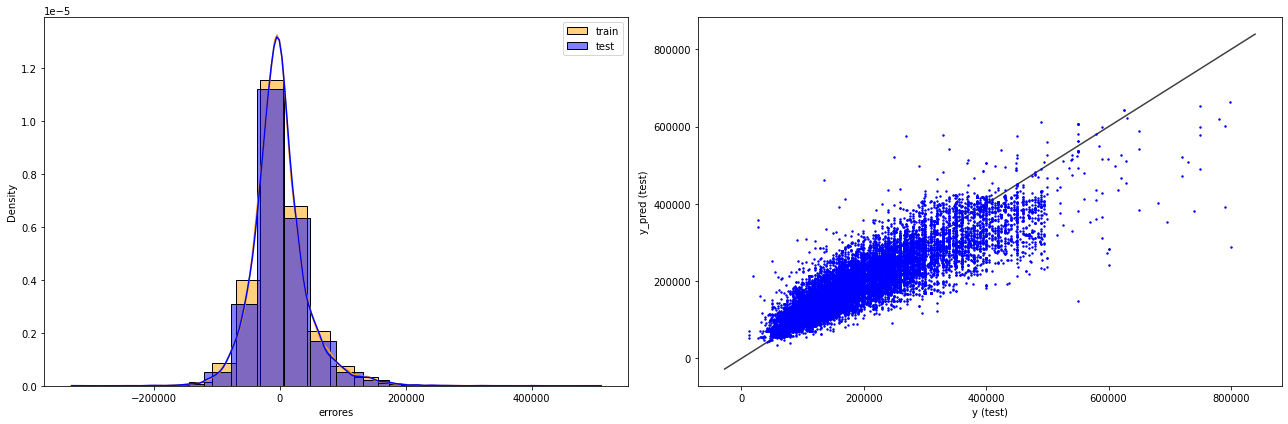

In [ ]:
errores_model_xgb = evaluar_regresion(model_xgb, X_train, X_test, y_train, y_test)


En esta primer aproximación vemos como el nuestro modelo consigue rendimiento si sacrificar equilibrio. Se espera una mejora luego de optimizar los parámetros.

Primero, realizamos una validación de la cantidad de árboles necesarios.

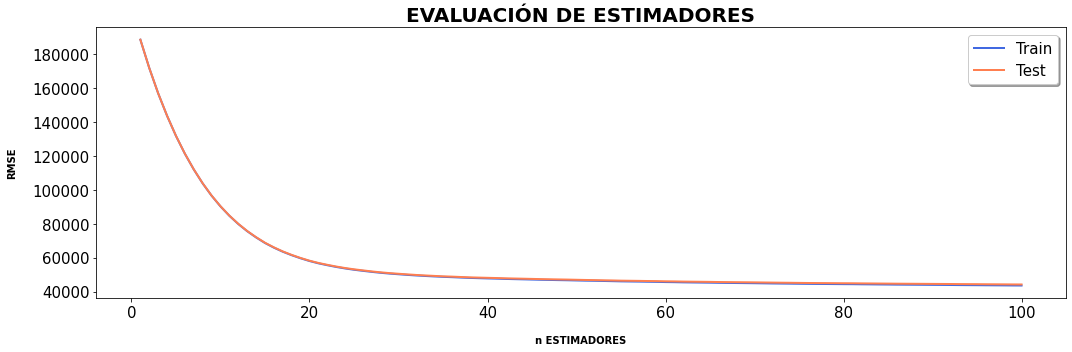

In [ ]:
xgboost_cv = xgb.cv(model_xgb.get_xgb_params(), xgb.DMatrix(X_train, y_train), metrics='rmse',
                    nfold=7, num_boost_round=model_xgb.get_params()['n_estimators'], seed=10)

plt.figure(figsize=(15,5), tight_layout=True)
plt.title('Evaluación de estimadores'.upper(), fontsize=20, weight='bold')
sns.lineplot(x=np.arange(1,101), y='train-rmse-mean', data=xgboost_cv, color='Royalblue', label='Train', linewidth=2)
sns.lineplot(x=np.arange(1,101), y='test-rmse-mean', data=xgboost_cv, color='Coral', label='Test', linewidth=2)
plt.legend(fontsize=15, framealpha=1, frameon=True, loc='upper right', shadow=True)
plt.xlabel('n ESTIMADORES', fontsize=10, labelpad=15, weight='bold')
plt.xticks(fontsize=15)
plt.ylabel('RMSE', fontsize=10, labelpad=15, weight='bold')
plt.yticks(fontsize=15)
plt.show()

A partir entre 50 estimadores se estabiliza el aprendizaje de nuestro modelo. Procedemos a optimizar la profundiad que van a usar nuestro modelo.

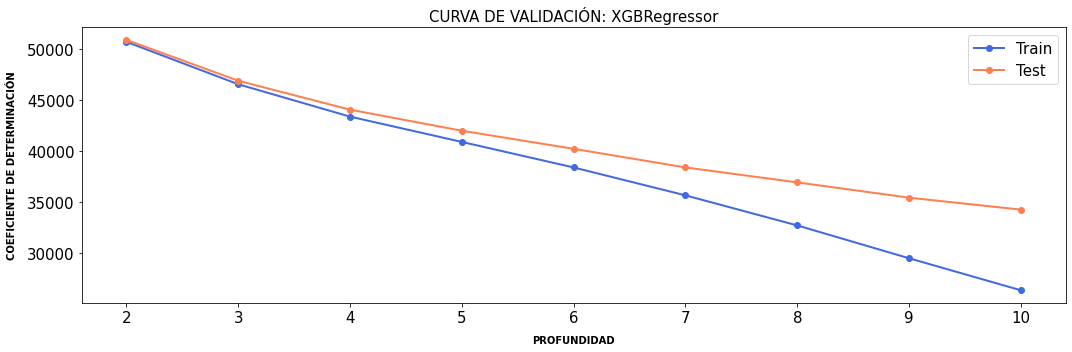

In [ ]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=50, n_jobs=-1, seed=10)

depth = range(2,11)
train_scores, test_scores = validation_curve(cv=7, estimator=model_xgb, X=X_train, y=y_train, n_jobs=-1, 
                                             param_name='max_depth', param_range=depth,
                                             scoring='neg_root_mean_squared_error')
plt.figure(figsize=(15,5), tight_layout=True)
plt.plot(depth, -pd.Series(train_scores.mean(axis=1), index=depth), 'o-', color='Royalblue', label='Train',
         linewidth=2)
plt.plot(depth, -pd.Series(test_scores.mean(axis=1), index=depth), 'o-', color='Coral', label='Test',
         linewidth=2)
plt.title('CURVA DE VALIDACIÓN: XGBRegressor', fontsize=15)
plt.legend(fancybox=True, fontsize=15, frameon=True, loc='upper right')
plt.xlabel('PROFUNDIDAD', fontsize=10, labelpad=10, weight='bold')
plt.xticks(fontsize=15)
plt.ylabel('COEFICIENTE DE DETERMINACIÓN', fontsize=10, labelpad=10, weight='bold')
plt.yticks(fontsize=15)
plt.show()

En el gráfico anterior podemos observar como una profundad de cinco nos permite mantener el modelo en equilibrio.

Por último, optimizamos el parámetros de regularización.

In [ ]:
params = {
    'alpha': [ .008, .009, .01, .02, .03 ],
    'lambda': [ .07, .08, .09, .1, .2, .3 ]
         }

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', max_depth=5, n_estimators=50, n_jobs=-1, seed=10)
search = GridSearchCV(cv=7, estimator=model_xgb, n_jobs=-1, param_grid=params, scoring='neg_root_mean_squared_error')
search.fit(X_train, y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=1, missing=None,
                                    n_estimators=50, n_jobs=-1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=10, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.008, 0.009, 0.01, 0.02, 0.03],
                         'lambda': [0.07, 0.08, 0.09, 0.1, 0.2

In [ ]:
print('Mejores parámetros:', search.best_params_)
print('Mejor R2: ' + str(round(search.best_score_, 4)))

Mejores parámetros: {'alpha': 0.008, 'lambda': 0.07}
Mejor R2: -42011.7746


Desplegamos el modelo luego de haber sido optimizado.

In [ ]:
model_xgb_best = xgb.XGBRegressor(objective='reg:squarederror', alpha=.008, reg_lambda=.07, max_depth=5, 
                             n_estimators=50, n_jobs=-1, seed=10)

In [ ]:
print('BOOSTING: XGBoost')
print('--------------------------------------------------------')
rmse = cross_val_score(model_xgb_best, X_train, y_train, cv=9, scoring='neg_root_mean_squared_error', n_jobs=-1)
print(f'RAÍZ DEL ERROR CUADRÁTICO MEDIO: { -rmse.mean().round(2) } (+/- { rmse.std().round(2) })')
r2 = cross_val_score(model_xgb_best, X_train, y_train, cv=9, scoring='r2', n_jobs=-1)
print(f'COEFICIENTE DE DETERMINACIÓN: { r2.mean().round(2) }\n')

BOOSTING: XGBoost
--------------------------------------------------------
RAÍZ DEL ERROR CUADRÁTICO MEDIO: 41970.23 (+/- 500.23)
COEFICIENTE DE DETERMINACIÓN: 0.8



In [ ]:
model_xgb_best.fit(X_train, y_train)

XGBRegressor(alpha=0.008, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=0.07, scale_pos_weight=1,
             seed=10, silent=None, subsample=1, verbosity=1)

XGBREGRESSOR(ALPHA=0.008, BASE_SCORE=0.5, BOOSTER='GBTREE', COLSAMPLE_BYLEVEL=1,
             COLSAMPLE_BYNODE=1, COLSAMPLE_BYTREE=1, GAMMA=0,
             IMPORTANCE_TYPE='GAIN', LEARNING_RATE=0.1, MAX_DELTA_STEP=0,
             MAX_DEPTH=5, MIN_CHILD_WEIGHT=1, MISSING=NONE, N_ESTIMATORS=50,
             N_JOBS=-1, NTHREAD=NONE, OBJECTIVE='REG:SQUAREDERROR',
             RANDOM_STATE=0, REG_ALPHA=0, REG_LAMBDA=0.07, SCALE_POS_WEIGHT=1,
             SEED=10, SILENT=NONE, SUBSAMPLE=1, VERBOSITY=1)
ERROR  TRAIN     TEST    
------ --------  --------
RMSE:  40909.62  42206.39 
R2:        0.81      0.80 


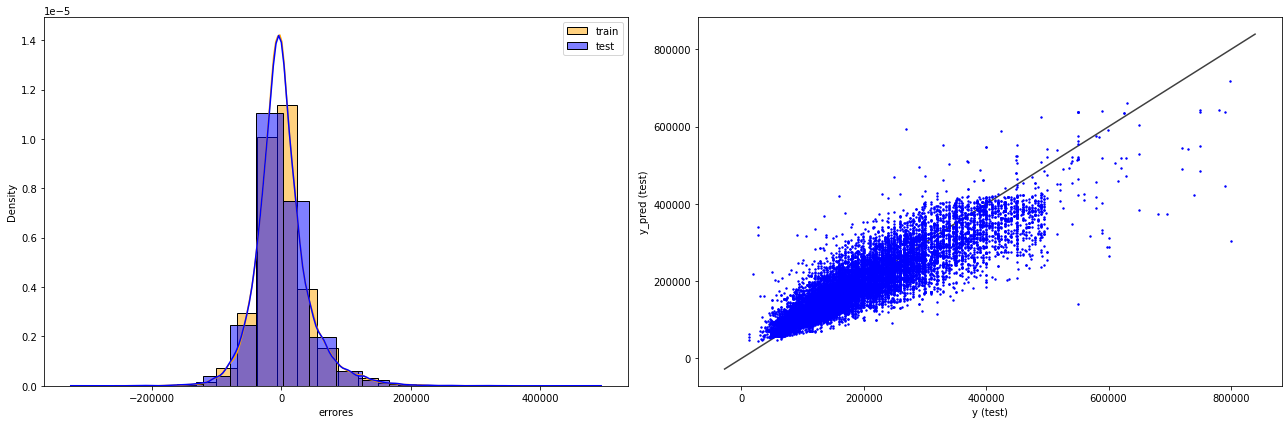

In [ ]:
errores_model_xgb_best = evaluar_regresion(model_xgb_best, X_train, X_test, y_train, y_test)

## **Análsis**

In [ ]:
l0=[errores_arbol_proyecto2[key][0].round(2) for key in errores_arbol_proyecto2]
l1=[errores_model_xgb[key][0].round(2) for key in errores_model_xgb]
l2=[errores_model_xgb_best[key][0].round(2) for key in errores_model_xgb_best]

names=['Benchmark', 'XGBoost', 'XGBoost Optimizado']

df_errores_train = pd.DataFrame(np.array([l0,l1,l2]), columns=['RMSE', 'R2'])
df_errores_train.insert(0,'Regresor',names,True)

print('Errores en train')
print(df_errores_train)
print(' ')

l0=[errores_arbol_proyecto2[key][1].round(2) for key in errores_arbol_proyecto2]
l1=[errores_model_xgb[key][1].round(2) for key in errores_model_xgb]
l2=[errores_model_xgb_best[key][1].round(2) for key in errores_model_xgb_best]

df_errores_test = pd.DataFrame(np.array([l0,l1,l2]), columns=['RMSE','R2'])
df_errores_test.insert(0,'Regresor',names,True)
print('Errores en test')
print(df_errores_test)

Errores en train
             Regresor      RMSE    R2
0           Benchmark  36295.05  0.85
1             XGBoost  43627.21  0.79
2  XGBoost Optimizado  40909.62  0.81
 
Errores en test
             Regresor      RMSE    R2
0           Benchmark  41804.46  0.80
1             XGBoost  44177.99  0.78
2  XGBoost Optimizado  42206.39  0.80


Se puede notar en cada uno de los modelos una mejora bastante considerable respecto al modelo del Proyecto 1.
Sin embargo se nota un overfiting que varia según el modelo utilizado, lo que significa que el modelo esta memorizando demasiado los datos en train, porque lo que los datos podría seguir mejorando.

## **Análisis final**


In [ ]:
l0=[errores_arbol_proyecto2[key][0].round(2) for key in errores_arbol_proyecto2]
l1=[errores_rf[key][0].round(2) for key in errores_rf]
l2=[errores_rf_best[key][0].round(2) for key in errores_rf_best]
l3=[errores_model_xgb[key][0].round(2) for key in errores_model_xgb]
l4=[errores_model_xgb_best[key][0].round(2) for key in errores_model_xgb_best]

names=['Benchmark', 'Random Forest', 'Random Forest Optimizado', 'XGBoost', 'XGBoost Optimizado']

df_errores_train = pd.DataFrame(np.array([l0,l1,l2,l3,l4]), columns=['RMSE', 'R2'])
df_errores_train.insert(0,'Regresor',names,True)

print('Errores en train')
print(df_errores_train)
print(' ')

l0=[errores_arbol_proyecto2[key][1].round(2) for key in errores_arbol_proyecto2]
l1=[errores_rf[key][1].round(2) for key in errores_rf]
l2=[errores_rf_best[key][1].round(2) for key in errores_rf_best]
l3=[errores_model_xgb[key][1].round(2) for key in errores_model_xgb]
l4=[errores_model_xgb_best[key][1].round(2) for key in errores_model_xgb_best]

df_errores_test = pd.DataFrame(np.array([l0,l1,l2,l3,l4]), columns=['RMSE','R2'])
df_errores_test.insert(0,'Regresor',names,True)
print('Errores en test')
print(df_errores_test)

Errores en train
                   Regresor      RMSE    R2
0                 Benchmark  36295.05  0.85
1             Random Forest  12519.83  0.98
2  Random Forest Optimizado  42122.59  0.80
3                   XGBoost  43627.21  0.79
4        XGBoost Optimizado  40909.62  0.81
 
Errores en test
                   Regresor      RMSE    R2
0                 Benchmark  41804.46  0.80
1             Random Forest  30269.22  0.90
2  Random Forest Optimizado  43625.59  0.78
3                   XGBoost  44177.99  0.78
4        XGBoost Optimizado  42206.39  0.80


Como vimos anteriormente el modelo de RadomForest que obtuvimos con sus valores por defecto es el que arroja un mejor rendimiento en la métrica r2. De todas formas, notamos la diferencia en la performance del modelo entre las etapas train y test, ya que tiene mejor rendimiento en término de sergos y peor rendimiento en términos de varianza.

De elegir un modelo en una primera instancia, me quedaria don el RandomForest por defecto y propondría mejorar el preprocesamiento o continuar analizando el modelo y sus parametros de manera mas exhaustiva.

De igual forma se nota un gran mejora en estos datos frente a los resultados obtenidos en el Proyecto_01.

# **Parte C**

¿Qué variables fueron relevantes para nuestros modelos a la hora de hacer una predicción? 

#### **IMPORTANCIA DE LAS VARIABLES**

##### **Random Forest**

Gráficamos la importancia de cada variable en nuestro modelo. 

Visualizamos la importancia de cada variable por permutación y por impureza.

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
permutation = permutation_importance(estimator=rf_best, X=X_train, y=y_train, n_repeats=10, scoring='r2', n_jobs=-1,
                                     random_state=10)

In [ ]:
permutation = pd.DataFrame({ k: permutation[k] for k in ['importances_mean', 'importances_std']})                
permutation['feature'] = X_train.columns
permutation.sort_values(by='importances_mean', ascending=False, inplace=True)

purity = pd.DataFrame((rf_best.feature_importances_.round(2)), columns=['Importancia'])
purity['feature'] = X_train.columns
purity.sort_values('Importancia', ascending=False, inplace=True)

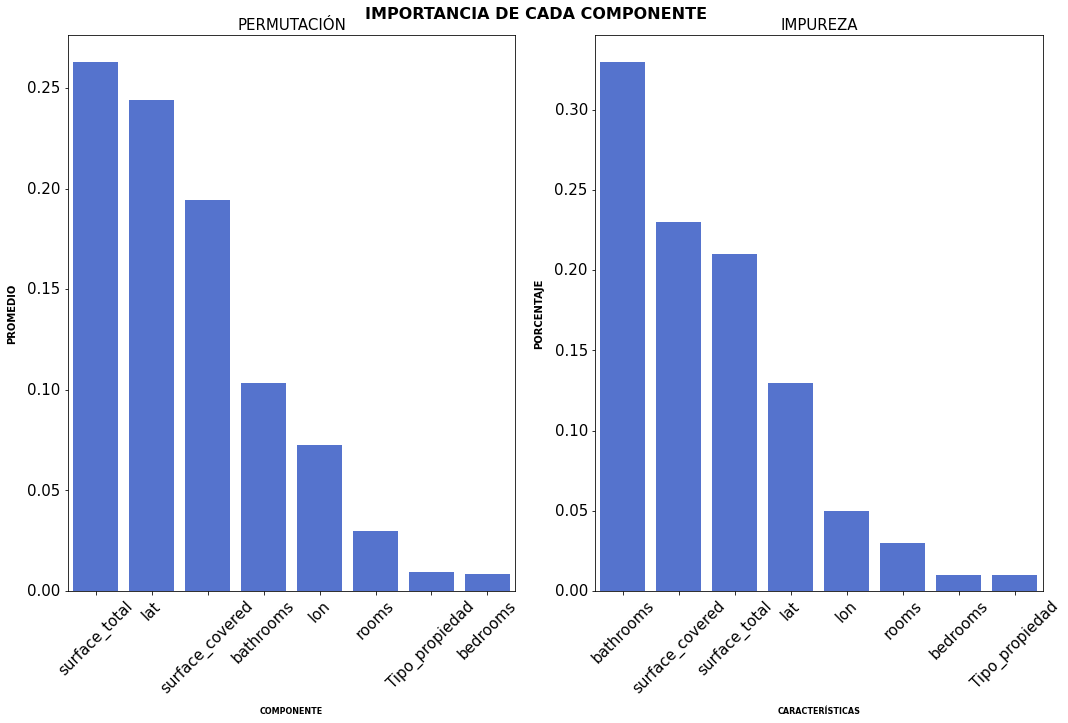

In [ ]:
plt.figure(figsize=(15,10), tight_layout=True).suptitle('Importancia de cada componente'.upper(), y=1.0, fontsize=16,
                                                       fontweight='bold')
plt.subplot(1,2,1)
plt.title('Permutación'.upper(), fontsize=15)
sns.barplot(x='feature', y='importances_mean', data=permutation, color='Royalblue')
#plt.tick_params(labelsize=20)
plt.xlabel('Componente'.upper(), fontsize=8, labelpad=10, weight='bold')
plt.xticks(fontsize=15, horizontalalignment='center', rotation=45)
plt.ylabel('Promedio'.upper(), fontsize=10, labelpad=10, weight='bold')
plt.yticks(fontsize=15, verticalalignment='center')
    
plt.subplot(1,2,2)
plt.title('Impureza'.upper(), fontsize=15)
sns.barplot(x='feature', y='Importancia', data=purity, color='Royalblue')
plt.xlabel('Características'.upper(), fontsize=8, labelpad=10, weight='bold')
plt.xticks(fontsize=15, horizontalalignment='center', rotation=45)
plt.ylabel('Porcentaje'.upper(), fontsize=10, labelpad=10, weight='bold')
plt.yticks(fontsize=15, verticalalignment='center')
plt.show()

Como podemos visualizar, la relevancia que toma cada variable son similares. 

Cabe destacar que la variable superficie total y cubierta recgen mayor información aportada, como es de esperar, ya que es una de las principales característica que define el precio de una propiedad.

Por otro lado podemos ver que la variable "baños" tambien juega un papel importante, consideramos que mientras más baños tenga una propiedad, posee un rango de precio más alto, por lo que conlleva instalar un baño.

**Importancia de los atributos en distintos arboles**

Elegimos algunos árboles al azar y observa qué atributos considera importantes. 


¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

In [ ]:
print(X_train.columns)

for number in range(1, 4, 1):
    x = stats.randint.rvs(0, 20)
    print('--------------------------------------------------------')
    print(f'RandomForestRegressor: Árbol {x}')
    print('--------------------------------------------------------')
    print(f'Importancia de cada atributo: { rf_best.estimators_[x].feature_importances_.round(2) }')
    print(f'Profundidad del árbol: { rf_best.estimators_[x].get_depth() }')
    print(f'Número de nodos terminales: { rf_best.estimators_[x].get_n_leaves() }\n')

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'Tipo_propiedad'],
      dtype='object')
--------------------------------------------------------
RandomForestRegressor: Árbol 14
--------------------------------------------------------
Importancia de cada atributo: [0.14 0.05 0.04 0.   0.08 0.46 0.22 0.01]
Profundidad del árbol: 8
Número de nodos terminales: 223

--------------------------------------------------------
RandomForestRegressor: Árbol 15
--------------------------------------------------------
Importancia de cada atributo: [0.13 0.05 0.01 0.05 0.17 0.47 0.12 0.01]
Profundidad del árbol: 8
Número de nodos terminales: 225

--------------------------------------------------------
RandomForestRegressor: Árbol 3
--------------------------------------------------------
Importancia de cada atributo: [0.12 0.05 0.01 0.02 0.45 0.18 0.15 0.01]
Profundidad del árbol: 8
Número de nodos terminales: 224



***analisis de importancia de las variables***
Como se puede apreciar, existe una leve variabilidad en la importancia de cada atributo de nuestro modelo de ensamble en los diferentes árboles que lo componen, así mismo, también varia la cantidad de nodos terminales.

##### **XGBoost**



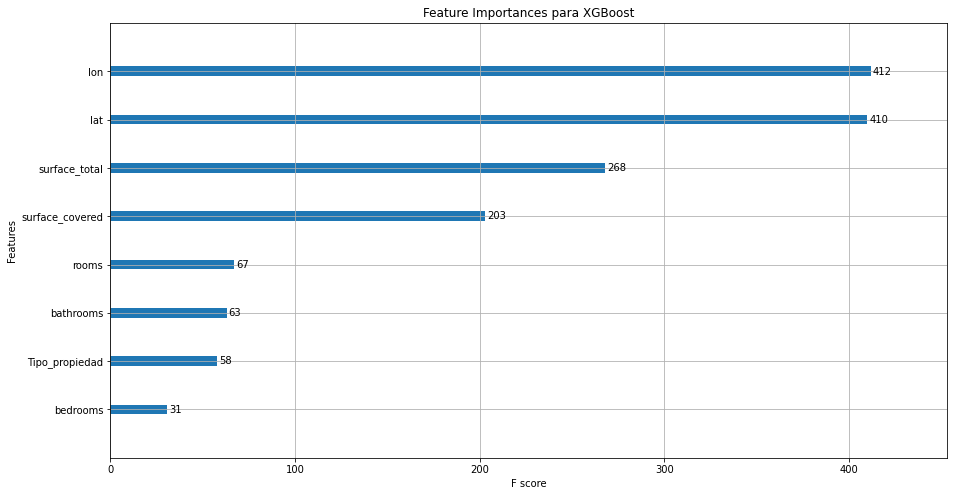

In [ ]:
plt.rcParams['figure.figsize'] = (15,8)
xgb.plot_importance(model_xgb_best,max_num_features=15, title='Feature Importances para XGBoost')

En lo que respecta al XGBoost, sus variables más importantes son la latitud y longitud, lo cual sorprende un poco, el resto de las variables eran esperadas.


#### **¿Cómo es la distribución de errores (regresión)?** 

¿Dónde falla? ¿A qué se debe?

RANDOMFORESTREGRESSOR(BOOTSTRAP=TRUE, CCP_ALPHA=0.0, CRITERION='MSE',
                      MAX_DEPTH=NONE, MAX_FEATURES='AUTO', MAX_LEAF_NODES=NONE,
                      MAX_SAMPLES=NONE, MIN_IMPURITY_DECREASE=0.0,
                      MIN_IMPURITY_SPLIT=NONE, MIN_SAMPLES_LEAF=1,
                      MIN_SAMPLES_SPLIT=2, MIN_WEIGHT_FRACTION_LEAF=0.0,
                      N_ESTIMATORS=20, N_JOBS=-1, OOB_SCORE=FALSE,
                      RANDOM_STATE=10, VERBOSE=0, WARM_START=FALSE)
ERROR  TRAIN     TEST    
------ --------  --------
RMSE:  13408.00  30890.32 
R2:        0.98      0.89 


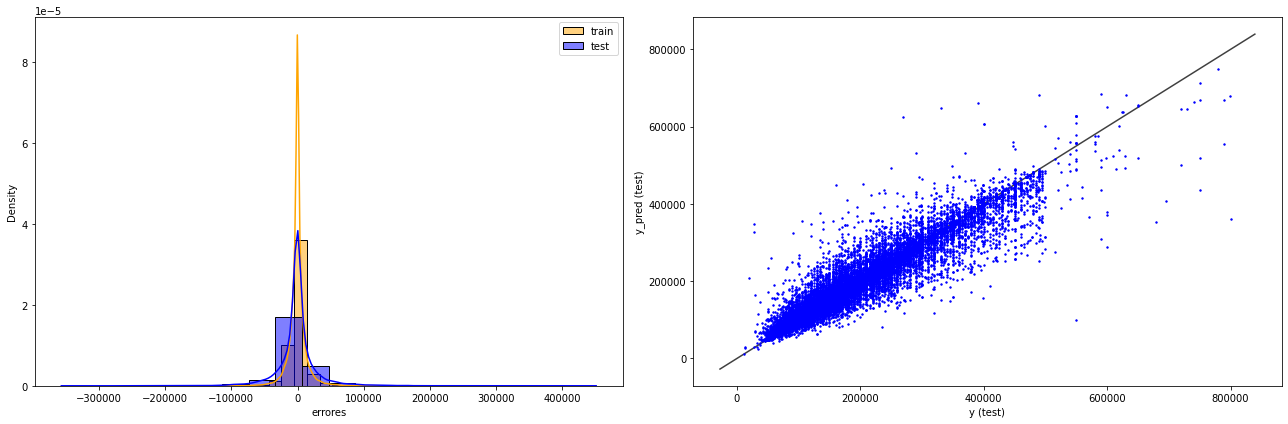

{'R2': [0.9797029451756526, 0.8910418548612112],
 'RMSE': [13407.995009997223, 30890.318114055975]}

In [ ]:
rf.fit(X_train, y_train)
evaluar_regresion(rf, X_train, X_test, y_train, y_test)

Si observarmos el gráfico de dispersión, se observa que el modelo tiene un mayor error al predecir variables más costosas, prediciendo un valor más bajo que el real. 

Esto puede pasar porque dentro del dataset no estamos teniendo en cuenta otras variables o factores relevantes que afectan el precio de una propiedad, como podrían ser: 

- Estado de la propiedad
- Antigüedad de la propiedad
- Expensas
- Seguridad privadad
- Características como: cochera, gimnasio, pileta, entre otros.